# TOTAL ENERGY PRODUCTION ?FORECASTING

## Loading All the required Libraries

In [15]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from sklearn.cluster import KMeans
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import *
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.losses import MeanSquaredError
from tensorflow.keras.metrics import RootMeanSquaredError
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import LSTM, Dense, TimeDistributed, Flatten
from tensorflow.keras.layers import GRU, Dense
from tensorflow.keras.layers import TimeDistributed, Flatten
from tensorflow.keras.layers import Conv1D, MaxPooling1D, Flatten, Dense, TimeDistributed
from statsmodels.tsa.arima.model import ARIMA
from keras.layers import Input
import warnings
warnings.filterwarnings('ignore', category=FutureWarning)
warnings.filterwarnings('ignore', category=UserWarning)

## Read the Dataset

In [16]:
# Laod and read the dataset
Renewables_new = pd.read_excel('prod_btu_re_te.xlsx',sheet_name='Total Renewables', header=1, index_col=0)

In [17]:
# Reset column names to the first row (State/Year) and skip the last row (US)
Renewables_new.columns = Renewables_new.iloc[0]
Renewables_Total = Renewables_new[1:]
# Print the file 
print(Renewables_Total)

State     1960     1961     1962     1963     1964     1965     1966     1967  \
AK        6800     7313     7453     7793     8102     8519     8328     8457   
AL      112809   118021   125564   112682   137992   121888   121238   144384   
AR       48104    51144    47637    41897    42732    46425    51697    46124   
AZ       36181    35083    34533    34861    34271    50095    58060    56423   
CA      270161   248178   329046   360333   331757   418518   375877   473192   
CO       16914    15464    17144    17410    17865    16369    17380    16908   
CT       17406    17076    15937    16253    16703    15500    16243    18072   
DC         155      163      166      148      138      120      111      112   
DE        4982     5101     5134     5356     5510     5577     5852     5783   
FL       35680    34417    35826    38613    39016    39916    42760    44550   
GA       96016    94590    96771   103171   118296   108022   109456   109475   
HI         292      258     

## Load the state abbrevation and divide the years to 6 decades.

In [18]:
# Define the state abbreviation dictionary
state_dict = {
    'AK': 'Alaska',
    'AL': 'Alabama',
    'AR': 'Arkansas',
    'AZ': 'Arizona',
    'CA': 'California',
    'CO': 'Colorado',
    'CT': 'Connecticut',
    'DC': 'District of Columbia',
    'DE': 'Delaware',
    'FL': 'Florida',
    'GA': 'Georgia',
    'HI': 'Hawaii',
    'IA': 'Iowa',
    'ID': 'Idaho',
    'IL': 'Illinois',
    'IN': 'Indiana',
    'KS': 'Kansas',
    'KY': 'Kentucky',
    'LA': 'Louisiana',
    'ME': 'Maine',
    'MD': 'Maryland',
    'MA': 'Massachusetts',
    'MI': 'Michigan',
    'MN': 'Minnesota',
    'MO': 'Missouri',
    'MS': 'Mississippi',
    'MT': 'Montana',
    'NE': 'Nebraska',
    'NV': 'Nevada',
    'NH': 'New Hampshire',
    'NJ': 'New Jersey',
    'NM': 'New Mexico',
    'NY': 'New York',
    'NC': 'North Carolina',
    'ND': 'North Dakota',
    'OH': 'Ohio',
    'OK': 'Oklahoma',
    'OR': 'Oregon',
    'PA': 'Pennsylvania',
    'RI': 'Rhode Island',
    'SC': 'South Carolina',
    'SD': 'South Dakota',
    'TN': 'Tennessee',
    'TX': 'Texas',
    'UT': 'Utah',
    'VT': 'Vermont',
    'VA': 'Virginia',
    'WA': 'Washington',
    'WV': 'West Virginia',
    'WI': 'Wisconsin',
    'WY': 'Wyoming',
    'US': 'United State'
}
# Select the columns for all time periods
Renewables_Total_1960_1970 = Renewables_Total.loc[:, '1960':'1970']
Renewables_Total_1970_1980 = Renewables_Total.loc[:, '1971':'1980']
Renewables_Total_1980_1990 = Renewables_Total.loc[:, '1981':'1990']
Renewables_Total_1990_2000 = Renewables_Total.loc[:, '1991':'2000']
Renewables_Total_2000_2010 = Renewables_Total.loc[:, '2001':'2010']
Renewables_Total_2010_2020 = Renewables_Total.loc[:, '2011':'2020']
# Calculate the average for each state over the specified years
average_1960_1970 = Renewables_Total_1960_1970.mean(axis=1)
average_1970_1980 = Renewables_Total_1970_1980.mean(axis=1)
average_1980_1990 = Renewables_Total_1980_1990.mean(axis=1)
average_1990_2000 = Renewables_Total_1990_2000.mean(axis=1)
average_2000_2010 = Renewables_Total_2000_2010.mean(axis=1)
average_2010_2020 = Renewables_Total_2010_2020.mean(axis=1)

## Print all states with its average for every 10 years

In [19]:
# Iterate through each time interval
time_intervals = [average_1960_1970, average_1970_1980, average_1980_1990, average_1990_2000, average_2000_2010, average_2010_2020]
for i, average_values in enumerate(time_intervals):
    states = []  # List to store full state names
    state_values = []  # List to store state values

    for state in average_values.index:
        # Check if the state abbreviation exists in the dictionary
        if state in state_dict:
            full_state_name = state_dict[state]
            state_value = average_values[state]
            states.append(full_state_name)
            state_values.append(state_value)
    # Year Range for 10 decade
    print(f"\nAverage of all states from {1960 + i * 10} to {1970 + i * 10}:")
    for j, state in enumerate(states):
        # Round the state value to a specific number of decimal places
        rounded_value = round(state_values[j], 2)
        print(f"State: {state} - Value: {rounded_value}")


Average of all states from 1960 to 1970:
State: Alaska - Value: 8049.18
State: Alabama - Value: 126234.36
State: Arkansas - Value: 51135.64
State: Arizona - Value: 49065.64
State: California - Value: 388302.18
State: Colorado - Value: 17473.82
State: Connecticut - Value: 17349.18
State: District of Columbia - Value: 132.18
State: Delaware - Value: 5816.64
State: Florida - Value: 42078.0
State: Georgia - Value: 104200.18
State: Hawaii - Value: 1053.73
State: Iowa - Value: 15031.73
State: Idaho - Value: 78033.64
State: Illinois - Value: 36309.0
State: Indiana - Value: 25627.18
State: Kansas - Value: 3633.27
State: Kentucky - Value: 51360.36
State: Louisiana - Value: 39112.36
State: Massachusetts - Value: 57301.27
State: Maryland - Value: 41703.64
State: Maine - Value: 57598.45
State: Michigan - Value: 55334.09
State: Minnesota - Value: 33672.45
State: Missouri - Value: 36661.82
State: Mississippi - Value: 38890.55
State: Montana - Value: 87306.82
State: North Carolina - Value: 120802.09

## Average the state into 5 clusters

### Average for 1960 to 1970 and dividing it into 5 clusters

In [20]:
# Combine the average values for 1960-1970
average_values = pd.concat([average_1960_1970], axis=--1)
average_values.columns = ['1960-1970']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1960-1970')

# Round off the values to 2 decimal places 
average_values['1960-1970'] = average_values['1960-1970'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1960-1970'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 1960 to 1970 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    # Sort states within the cluster
    cluster_states = cluster_states.sort_values(by='1960-1970')  
    cluster_min = cluster_states['1960-1970'].min()
    cluster_max = cluster_states['1960-1970'].max()
    for state, value in zip(cluster_states.index, cluster_states['1960-1970']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Renewables_Total_1960_1970.csv', index=True)

All the states from 1960 to 1970 after clustering:

States in Cluster 0:
State: DC - Value: 132.18
State: HI - Value: 1053.73
State: KS - Value: 3633.27
State: RI - Value: 3754.45
State: DE - Value: 5816.64
State: NM - Value: 6251.73
State: AK - Value: 8049.18
State: UT - Value: 9444.91
State: WY - Value: 10697.09
State: NE - Value: 13802.09
State: IA - Value: 15031.73
State: VT - Value: 15174.27
State: CT - Value: 17349.18
State: CO - Value: 17473.82
State: OK - Value: 17509.09
State: NV - Value: 19402.73
State: ND - Value: 21884.45
State: WV - Value: 21897.0
State: NJ - Value: 23336.55
State: NH - Value: 24634.09
State: IN - Value: 25627.18
State: MN - Value: 33672.45
State: IL - Value: 36309.0
State: MO - Value: 36661.82
State: MS - Value: 38890.55
State: LA - Value: 39112.36
State: OH - Value: 39867.82
State: SD - Value: 41223.82
State: MD - Value: 41703.64
State: FL - Value: 42078.0
State: AZ - Value: 49065.64
State: AR - Value: 51135.64
State: KY - Value: 51360.36
State: TX - Val

### Plot all the cluters into map using Tablaue

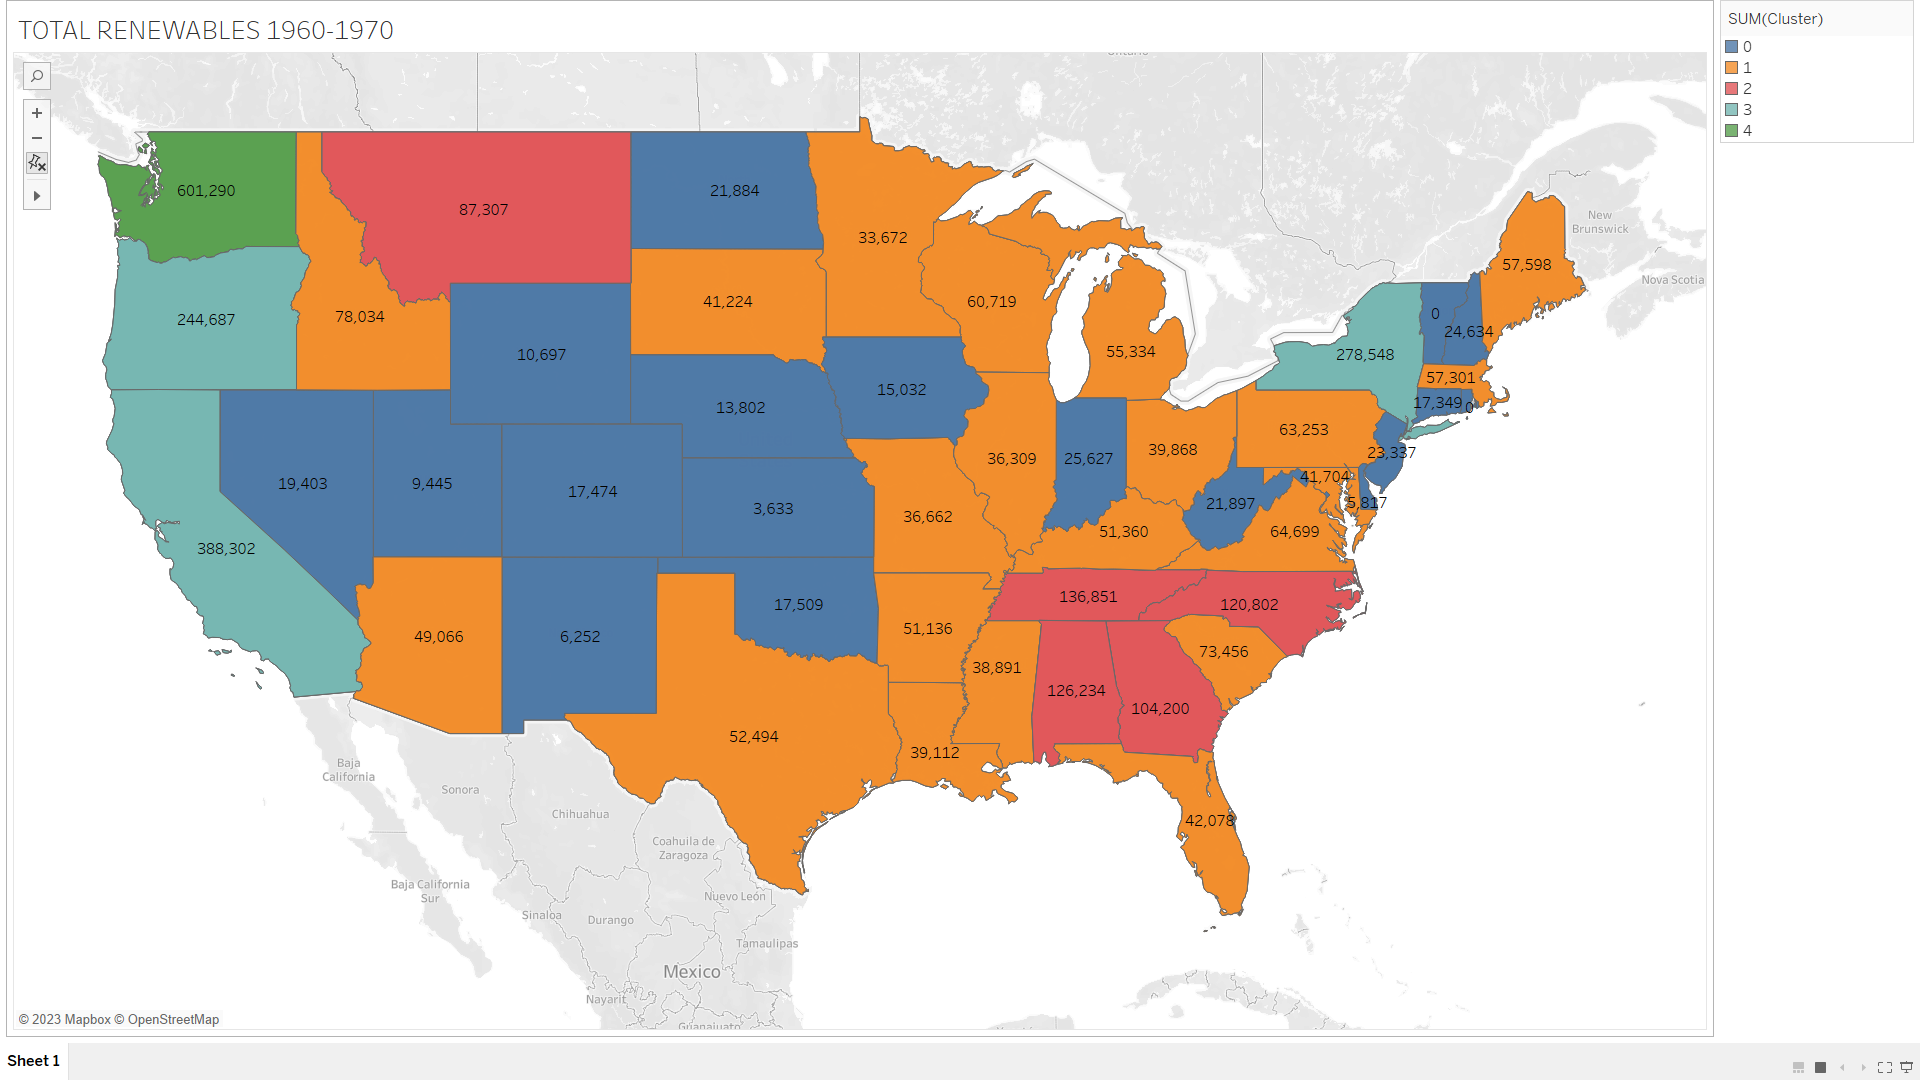

### Average for 1970 to 1980 and dividing it into 5 clusters

In [19]:
# Combine the average values for 1970-1980
average_values = pd.concat([average_1970_1980], axis=1)
average_values.columns = ['1970-1980']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1970-1980')

# Round off the values to 2 decimal places 
average_values['1970-1980'] = average_values['1970-1980'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1970-1980'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 1970 to 1980 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1970-1980')  # Sort states within the cluster
    cluster_min = cluster_states['1970-1980'].min()
    cluster_max = cluster_states['1970-1980'].max()
    for state, value in zip(cluster_states.index, cluster_states['1970-1980']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Renewables_Total_1970-1980.csv', index=True)


All the states from 1970 to 1980 after clustering:

States in Cluster 0:
State: DC - Value: 416.4
State: HI - Value: 2557.7
State: RI - Value: 5495.3
State: NM - Value: 6377.1
State: KS - Value: 6533.4
State: DE - Value: 8234.9
State: AK - Value: 9306.1
State: UT - Value: 13448.1
State: WY - Value: 13568.3
State: NE - Value: 16635.9
State: VT - Value: 18461.6
State: NV - Value: 19289.5
State: IA - Value: 21311.8
State: WV - Value: 25148.4
State: CT - Value: 25699.9
State: CO - Value: 25945.6
State: NH - Value: 29533.7
State: ND - Value: 30126.4
State: MS - Value: 34413.1
State: NJ - Value: 35725.8
State: OK - Value: 36139.8
State: IN - Value: 38204.9
State: MO - Value: 40200.9
State: MN - Value: 41009.8
State: LA - Value: 46887.6
Cluster 0 Range: 416.40 - 46887.60

States in Cluster 1:
State: IL - Value: 53153.1
State: MD - Value: 55600.3
State: OH - Value: 59286.2
State: FL - Value: 60432.8
State: MI - Value: 60581.9
State: MA - Value: 62566.3
State: KY - Value: 67075.0
State: SD - Va

### Plot all the cluters into map using Tablaue

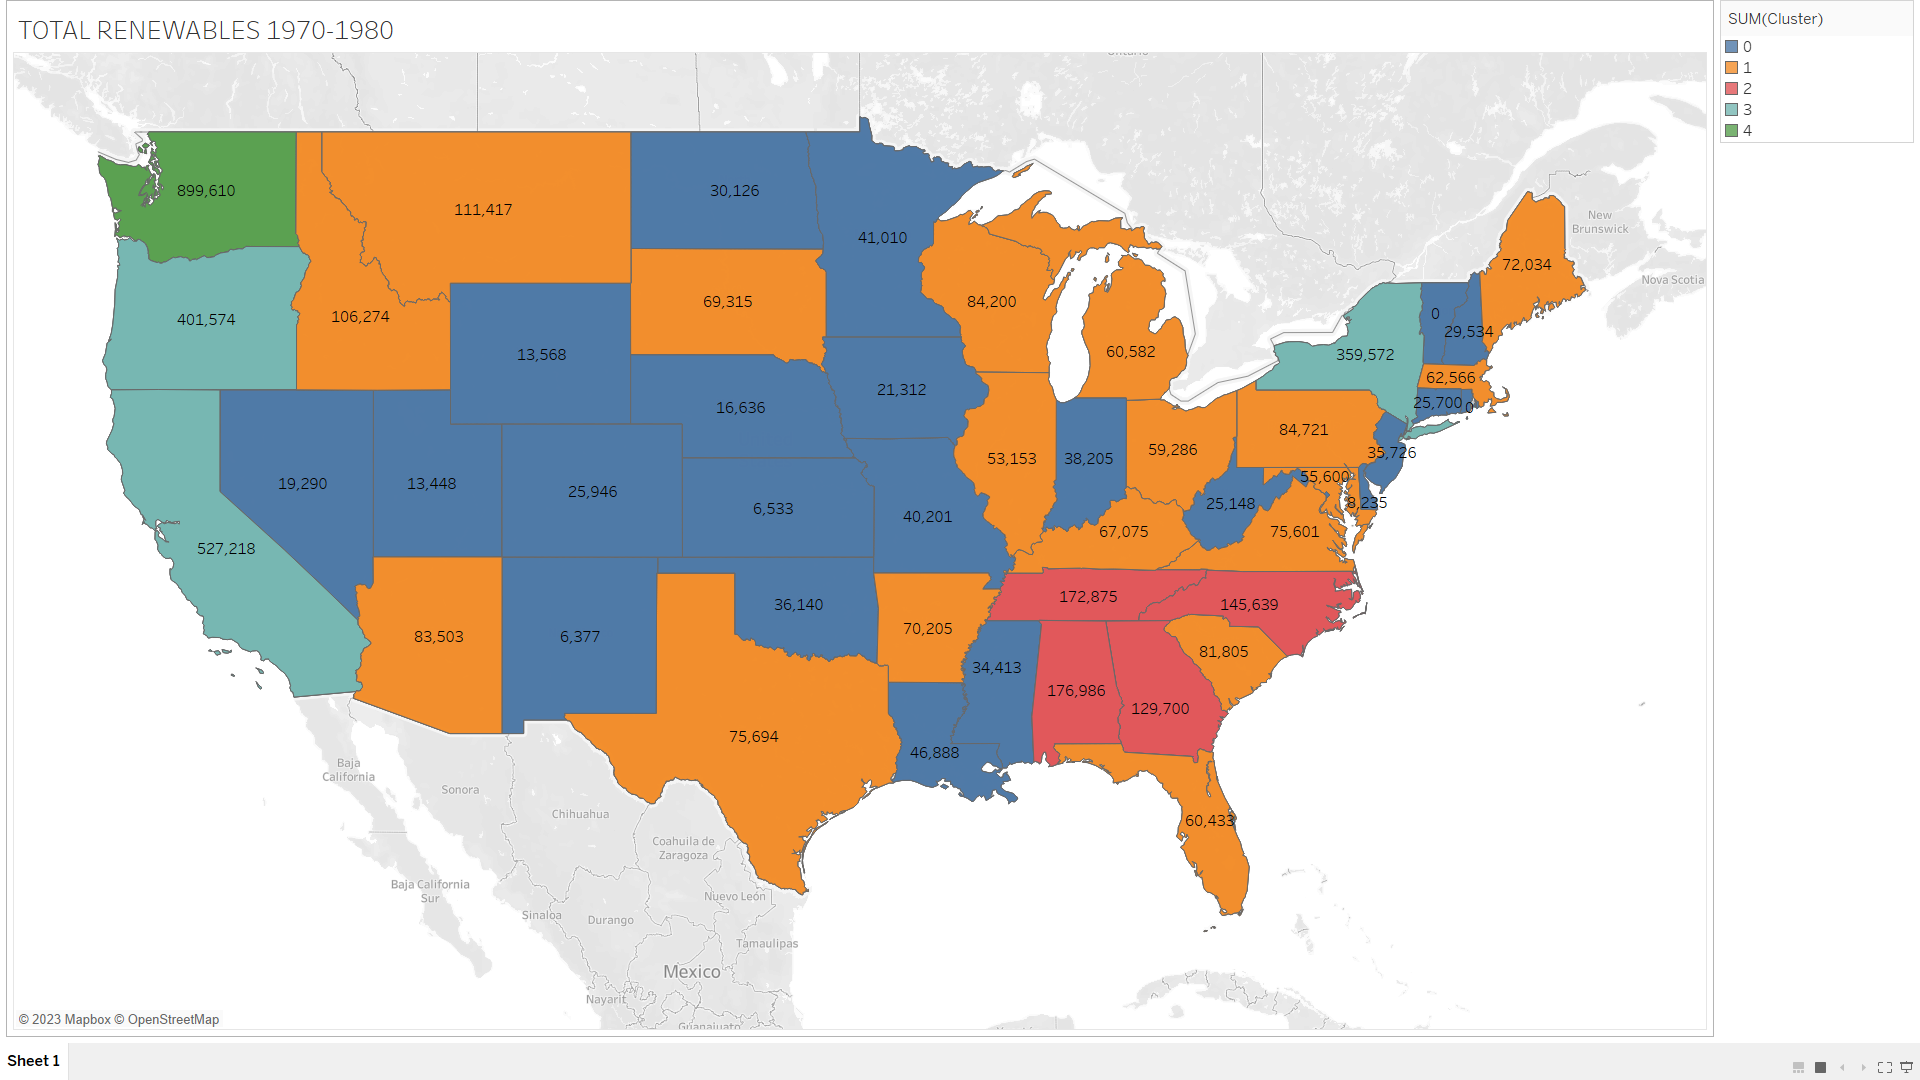

### Average for 1980 to 1990 and dividing it into 5 clusters

In [20]:
# Combine the average values for 1980-1990
average_values = pd.concat([average_1980_1990], axis=1)
average_values.columns = ['1980-1990']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1980-1990')

# Round off the values to 2 decimal places 
average_values['1980-1990'] = average_values['1980-1990'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1980-1990'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 1980 to 1990 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1980-1990')  # Sort states within the cluster
    cluster_min = cluster_states['1980-1990'].min()
    cluster_max = cluster_states['1980-1990'].max()
    for state, value in zip(cluster_states.index, cluster_states['1980-1990']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Renewables_Total_1980-1990.csv', index=True)


All the states from 1980 to 1990 after clustering:

States in Cluster 0:
State: DE - Value: 2475.2
State: DC - Value: 2652.6
State: RI - Value: 4991.3
State: NM - Value: 9403.5
State: AK - Value: 12265.1
State: WY - Value: 13097.7
State: KS - Value: 15966.0
State: UT - Value: 16210.6
State: HI - Value: 18593.7
State: NE - Value: 21186.3
State: VT - Value: 23518.1
State: WV - Value: 25492.5
State: ND - Value: 27321.0
State: CO - Value: 34243.4
State: NV - Value: 36515.4
State: NH - Value: 37451.2
State: CT - Value: 38533.2
State: OK - Value: 42417.4
State: MO - Value: 43828.2
State: NJ - Value: 44542.4
State: MD - Value: 51895.2
State: MS - Value: 53546.2
State: SD - Value: 58397.5
State: MN - Value: 61702.8
State: KY - Value: 63738.5
State: IN - Value: 66984.3
State: MA - Value: 67273.2
Cluster 0 Range: 2475.20 - 67273.20

States in Cluster 1:
State: SC - Value: 81461.4
State: IA - Value: 88862.1
State: VA - Value: 92079.2
State: LA - Value: 92804.9
State: AR - Value: 94191.3
State: TX

### Plot all the cluters into map using Tablaue

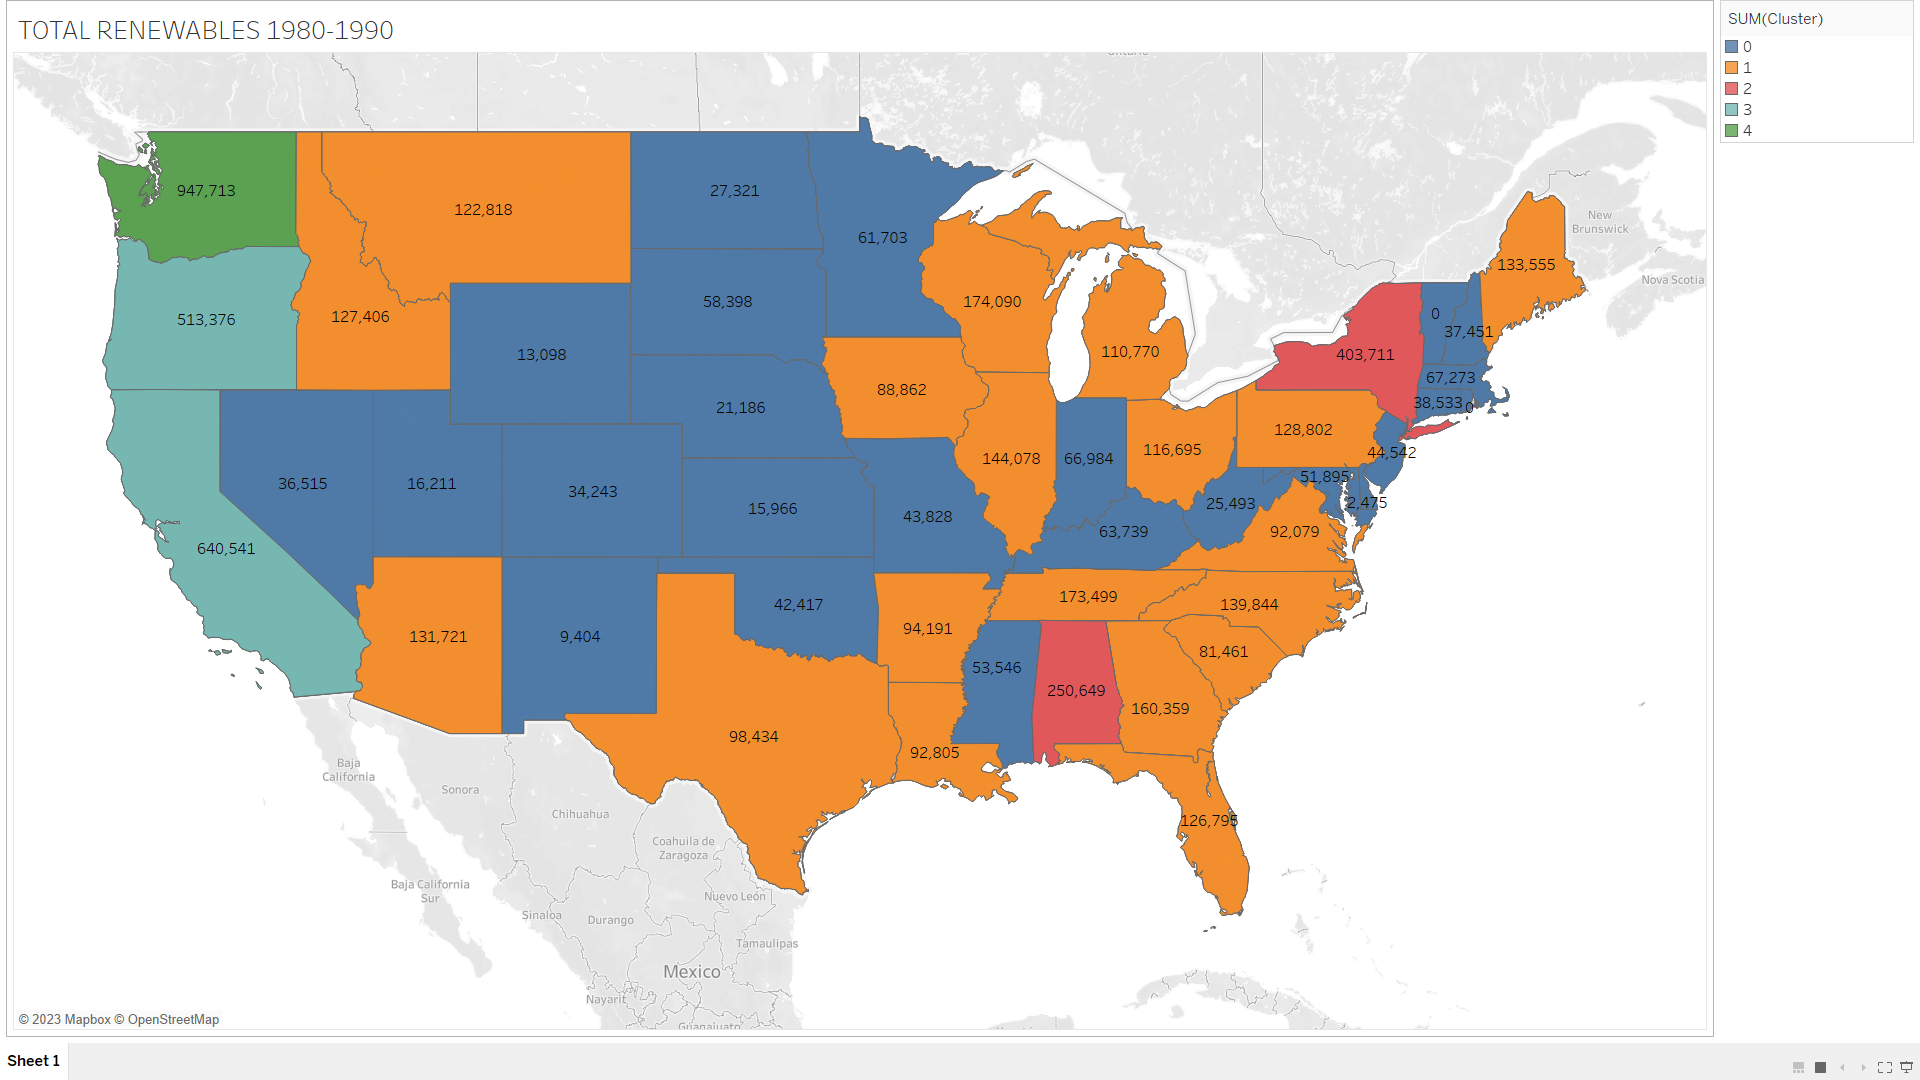

### Average for 1990 to 2000 and dividing it into 5 clusters

In [21]:
# Combine the average values for 1990-2000
average_values = pd.concat([average_1990_2000], axis=1)
average_values.columns = ['1990-2000']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='1990-2000')

# Round off the values to 2 decimal places
average_values['1990-2000'] = average_values['1990-2000'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['1990-2000'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 1990 to 2000 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='1990-2000')  # Sort states within the cluster
    cluster_min = cluster_states['1990-2000'].min()
    cluster_max = cluster_states['1990-2000'].max()
    for state, value in zip(cluster_states.index, cluster_states['1990-2000']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Renewables_Total_1990-2000.csv', index=True)


All the states from 1990 to 2000 after clustering:

States in Cluster 0:
State: DC - Value: 1553.7
State: DE - Value: 2197.8
State: RI - Value: 4778.0
State: NM - Value: 8898.0
State: WY - Value: 12887.8
State: KS - Value: 13640.3
State: UT - Value: 16168.5
State: AK - Value: 17418.9
State: WV - Value: 17949.7
State: VT - Value: 19409.2
State: HI - Value: 24255.5
State: ND - Value: 28240.9
State: CO - Value: 29729.6
State: MO - Value: 34051.7
State: NJ - Value: 39592.7
State: NH - Value: 41341.5
State: NV - Value: 43400.8
State: NE - Value: 45135.1
State: CT - Value: 45534.0
State: KY - Value: 49133.3
State: IN - Value: 50443.8
State: MD - Value: 51834.7
State: OK - Value: 53603.5
State: SD - Value: 61923.9
State: MA - Value: 70257.5
State: OH - Value: 73648.7
Cluster 0 Range: 1553.70 - 73648.70

States in Cluster 1:
State: MN - Value: 79443.7
State: MS - Value: 83655.6
State: AZ - Value: 105648.2
State: MI - Value: 108308.4
State: IA - Value: 108701.1
State: PA - Value: 110712.6
State

### Plot all the cluters into map using Tablaue

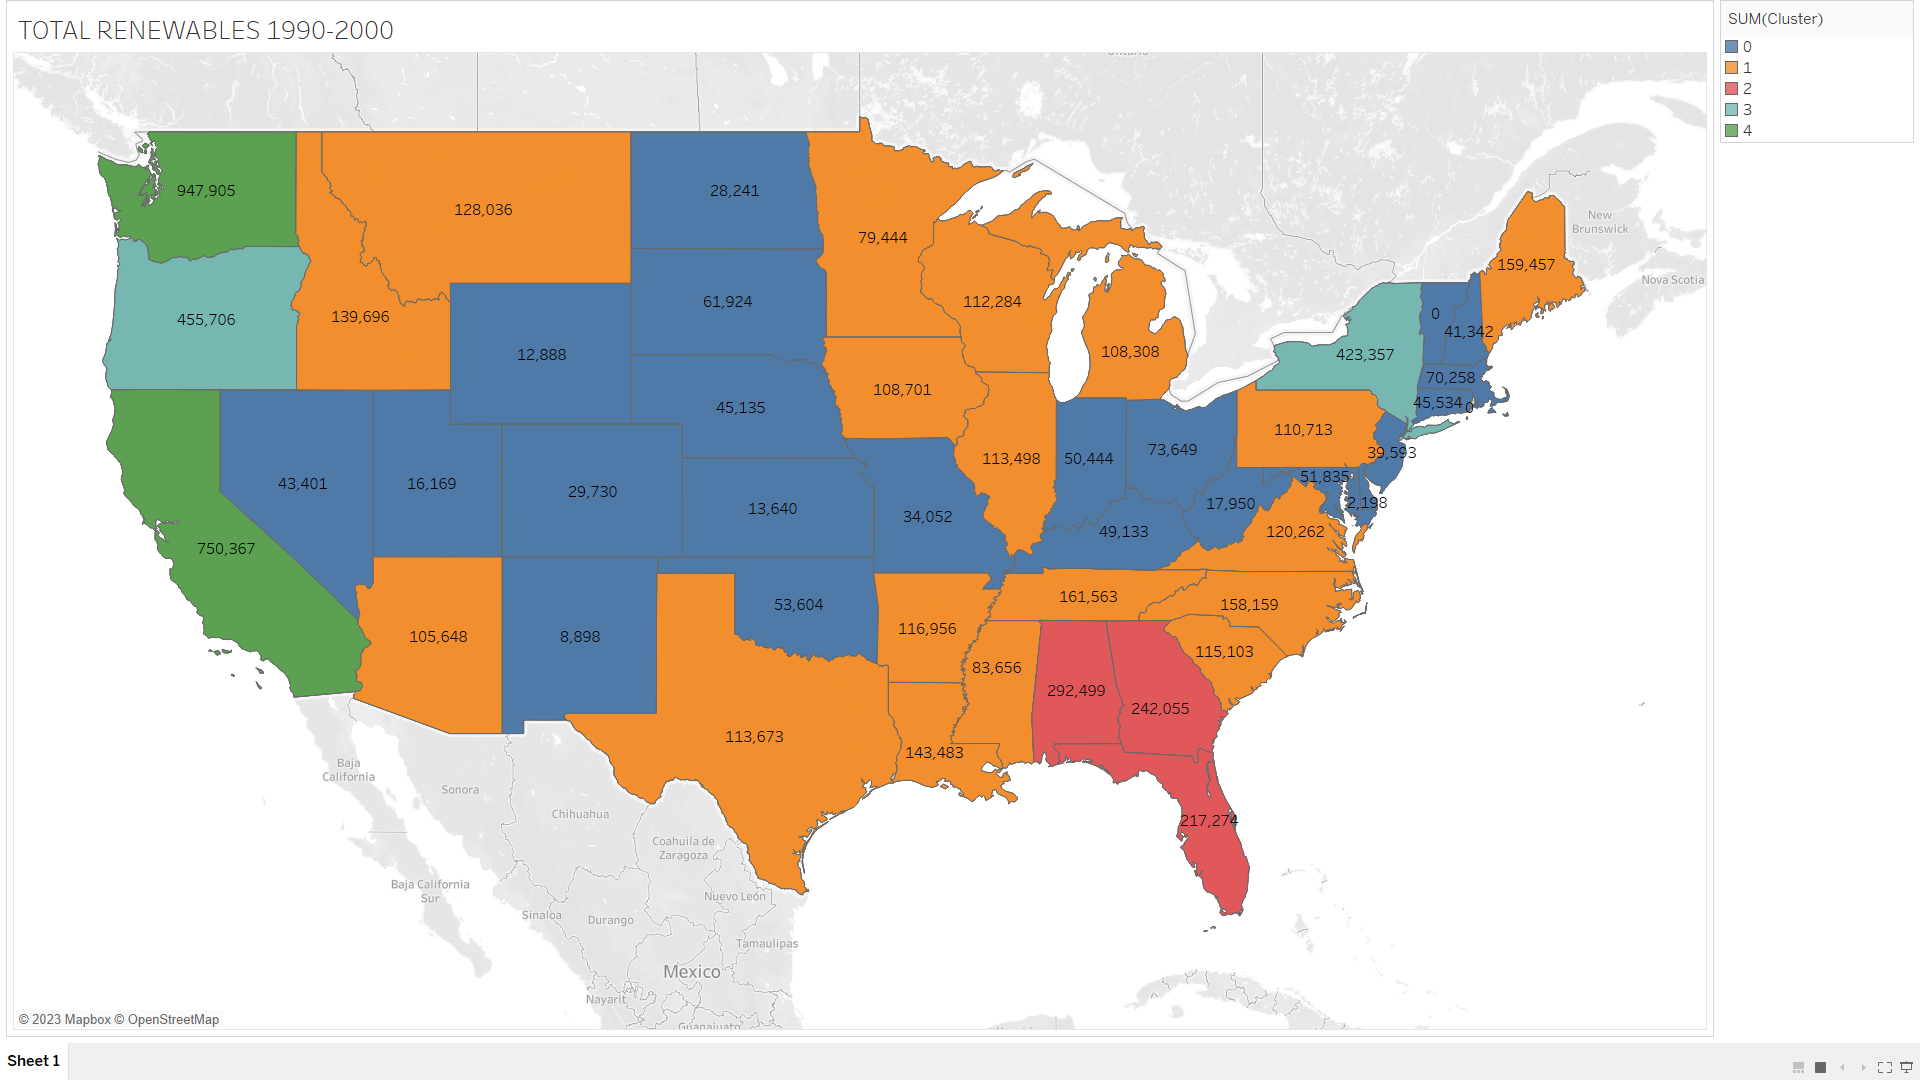

### Average for 2000 to 2010 and dividing it into 5 clusters

In [22]:
# Combine the average values for 2000-2010
average_values = pd.concat([average_2000_2010], axis=1)
average_values.columns = ['2000-2010']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2000-2010')

# Round off the values to 2 decimal places 
average_values['2000-2010'] = average_values['2000-2010'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2000-2010'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 2000 to 2010 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2000-2010')  # Sort states within the cluster
    cluster_min = cluster_states['2000-2010'].min()
    cluster_max = cluster_states['2000-2010'].max()
    for state, value in zip(cluster_states.index, cluster_states['2000-2010']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Renewables_Total_2000-2010.csv', index=True)


All the states from 2000 to 2010 after clustering:

States in Cluster 0:
State: DC - Value: 398.5
State: DE - Value: 1918.5
State: RI - Value: 3177.0
State: UT - Value: 12794.8
State: HI - Value: 13880.0
State: AK - Value: 16145.0
State: WY - Value: 21129.5
State: NM - Value: 22485.4
State: VT - Value: 24774.1
State: NJ - Value: 26862.9
State: WV - Value: 27202.8
State: CT - Value: 28119.9
State: NH - Value: 36344.6
State: NV - Value: 39477.4
State: ND - Value: 44264.2
State: MD - Value: 45090.0
State: MA - Value: 46338.2
State: CO - Value: 46539.5
State: KS - Value: 49045.8
State: MS - Value: 57361.4
State: MO - Value: 59744.9
State: OK - Value: 63228.2
State: KY - Value: 64155.8
State: OH - Value: 69420.3
Cluster 0 Range: 398.50 - 69420.30

States in Cluster 1:
State: AZ - Value: 84656.7
State: IN - Value: 88718.9
State: SC - Value: 97080.0
State: VA - Value: 109372.2
State: MT - Value: 109678.0
State: SD - Value: 110591.5
State: AR - Value: 113559.5
State: PA - Value: 113696.1
State

### Plot all the cluters into map using Tablaue

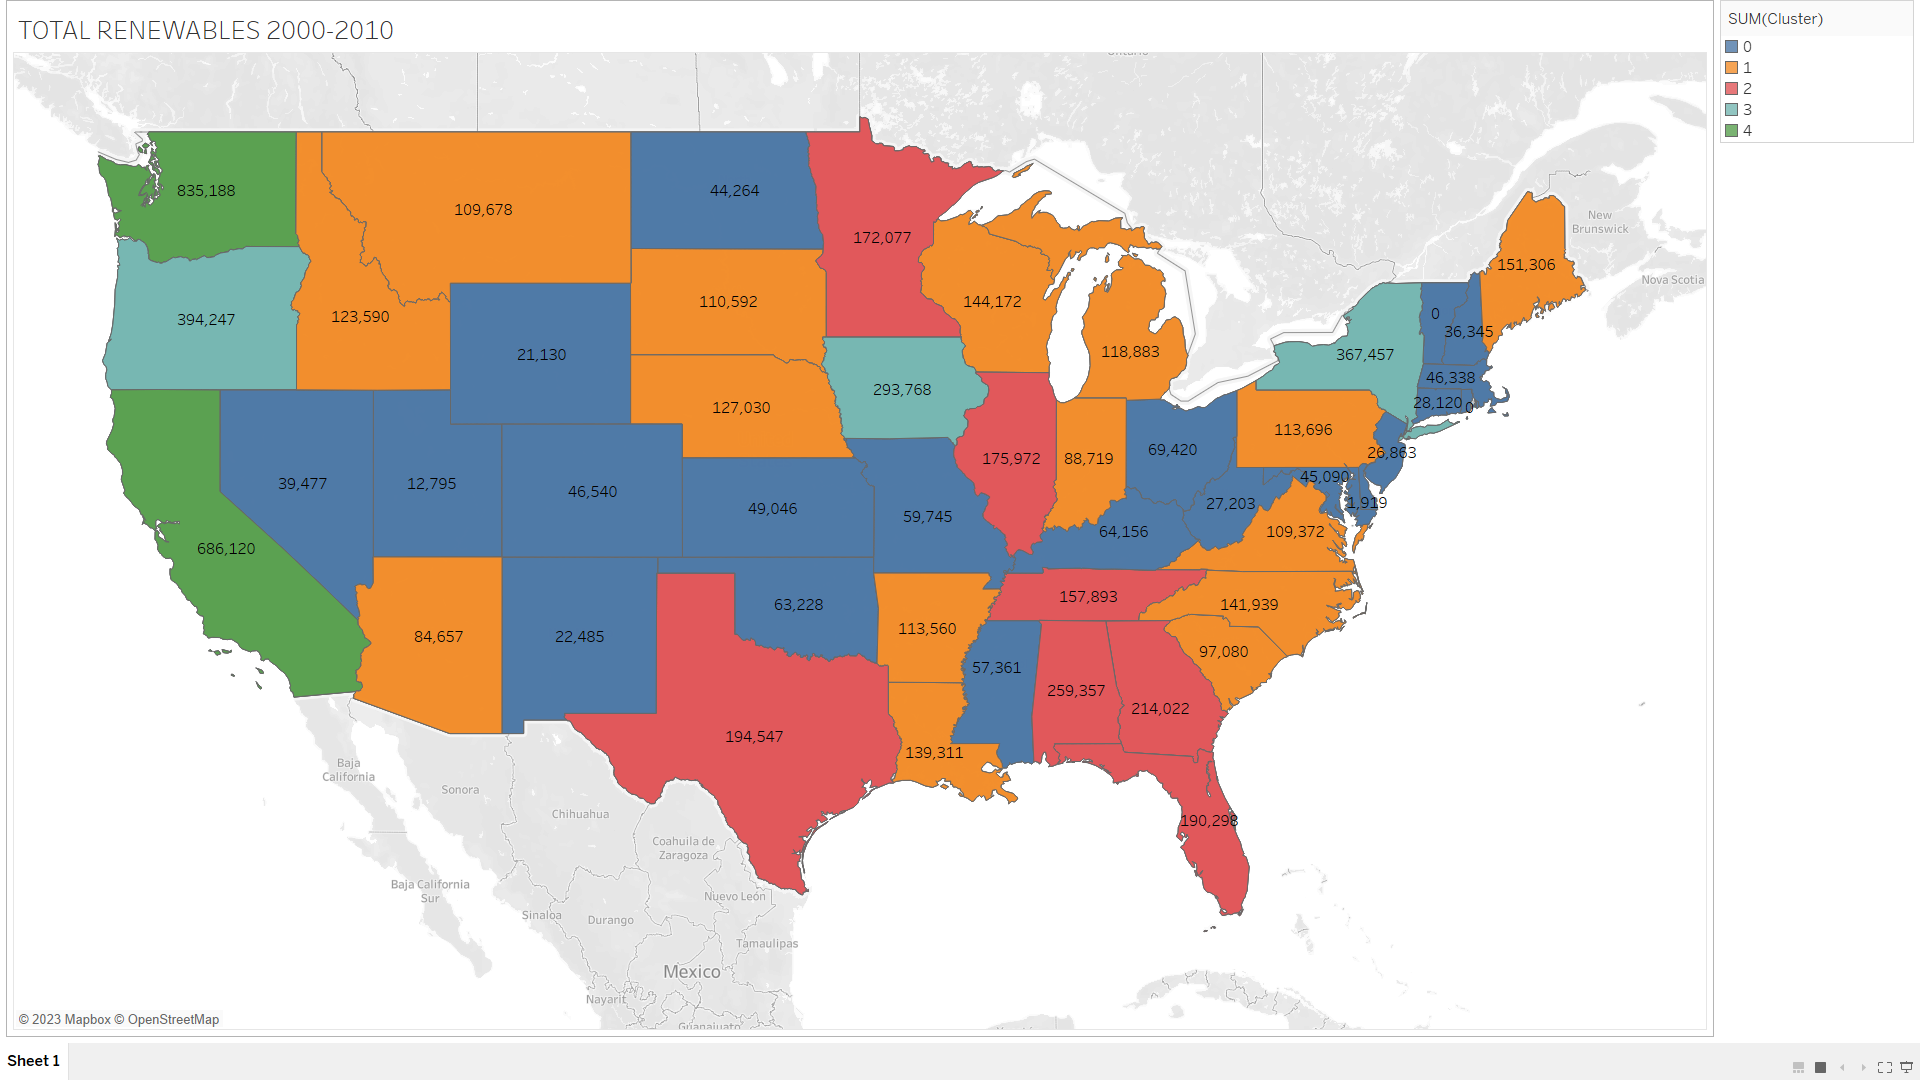

### Average for 2010 to 2020 and dividing it into 5 clusters

In [23]:
# Combine the average values for 2010-2020
average_values = pd.concat([average_2010_2020], axis=1)
average_values.columns = ['2010-2020']

# Normalize the data
normalized_data = (average_values - average_values.min()) / (average_values.max() - average_values.min())

# Create a K-Means model with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=0)

# Fit the model to the normalized data
kmeans.fit(normalized_data)

# Add the cluster labels to the original dataframe
average_values['Cluster'] = kmeans.labels_

# Sort the clusters based on the average values
average_values = average_values.sort_values(by='2010-2020')

# Round off the values to 2 decimal places 
average_values['2010-2020'] = average_values['2010-2020'].round(2)

# Reorder the clusters based on the median value of each cluster
cluster_medians = average_values.groupby('Cluster')['2010-2020'].median().sort_values().index
cluster_mapping = {cluster: i for i, cluster in enumerate(cluster_medians)}
average_values['Cluster'] = average_values['Cluster'].map(cluster_mapping)

# Print the states, their average values, and their cluster assignments with states within each cluster sorted
print(f"All the states from 2010 to 2020 after clustering:")
for i in range(5):
    print(f"\nStates in Cluster {i}:")
    cluster_states = average_values[average_values['Cluster'] == i]
    cluster_states = cluster_states.sort_values(by='2010-2020')  # Sort states within the cluster
    cluster_min = cluster_states['2010-2020'].min()
    cluster_max = cluster_states['2010-2020'].max()
    for state, value in zip(cluster_states.index, cluster_states['2010-2020']):
        print(f"State: {state} - Value: {value}")
    print(f"Cluster {i} Range: {cluster_min:.2f} - {cluster_max:.2f}")

# Add state full names to the dataframe 
average_values['State Full Name'] = average_values.index.map(state_dict)

# Save the DataFrame to a CSV file
average_values.to_csv('Renewables_Total_2010-2020.csv', index=True)


All the states from 2010 to 2020 after clustering:

States in Cluster 0:
State: DC - Value: 1019.5
State: DE - Value: 3619.5
State: RI - Value: 5617.1
State: AK - Value: 21640.1
State: HI - Value: 24085.4
State: CT - Value: 33282.7
State: UT - Value: 34792.4
State: VT - Value: 35517.2
State: WV - Value: 44394.0
State: NJ - Value: 47222.4
State: MD - Value: 53309.4
State: NH - Value: 53448.9
State: WY - Value: 57372.8
State: NM - Value: 59143.3
State: MA - Value: 64236.6
State: MS - Value: 69222.9
State: KY - Value: 82093.4
State: NV - Value: 83684.3
Cluster 0 Range: 1019.50 - 83684.30

States in Cluster 1:
State: MO - Value: 115801.4
State: AR - Value: 120137.7
State: AZ - Value: 130175.8
State: MT - Value: 131248.2
State: VA - Value: 132963.8
State: SC - Value: 135823.2
State: CO - Value: 139732.2
State: ME - Value: 152010.5
State: LA - Value: 156082.6
State: ID - Value: 160865.6
State: OH - Value: 160874.7
State: ND - Value: 168873.6
State: TN - Value: 180578.9
Cluster 1 Range: 11580

### Plot all the cluters into map using Tablaue

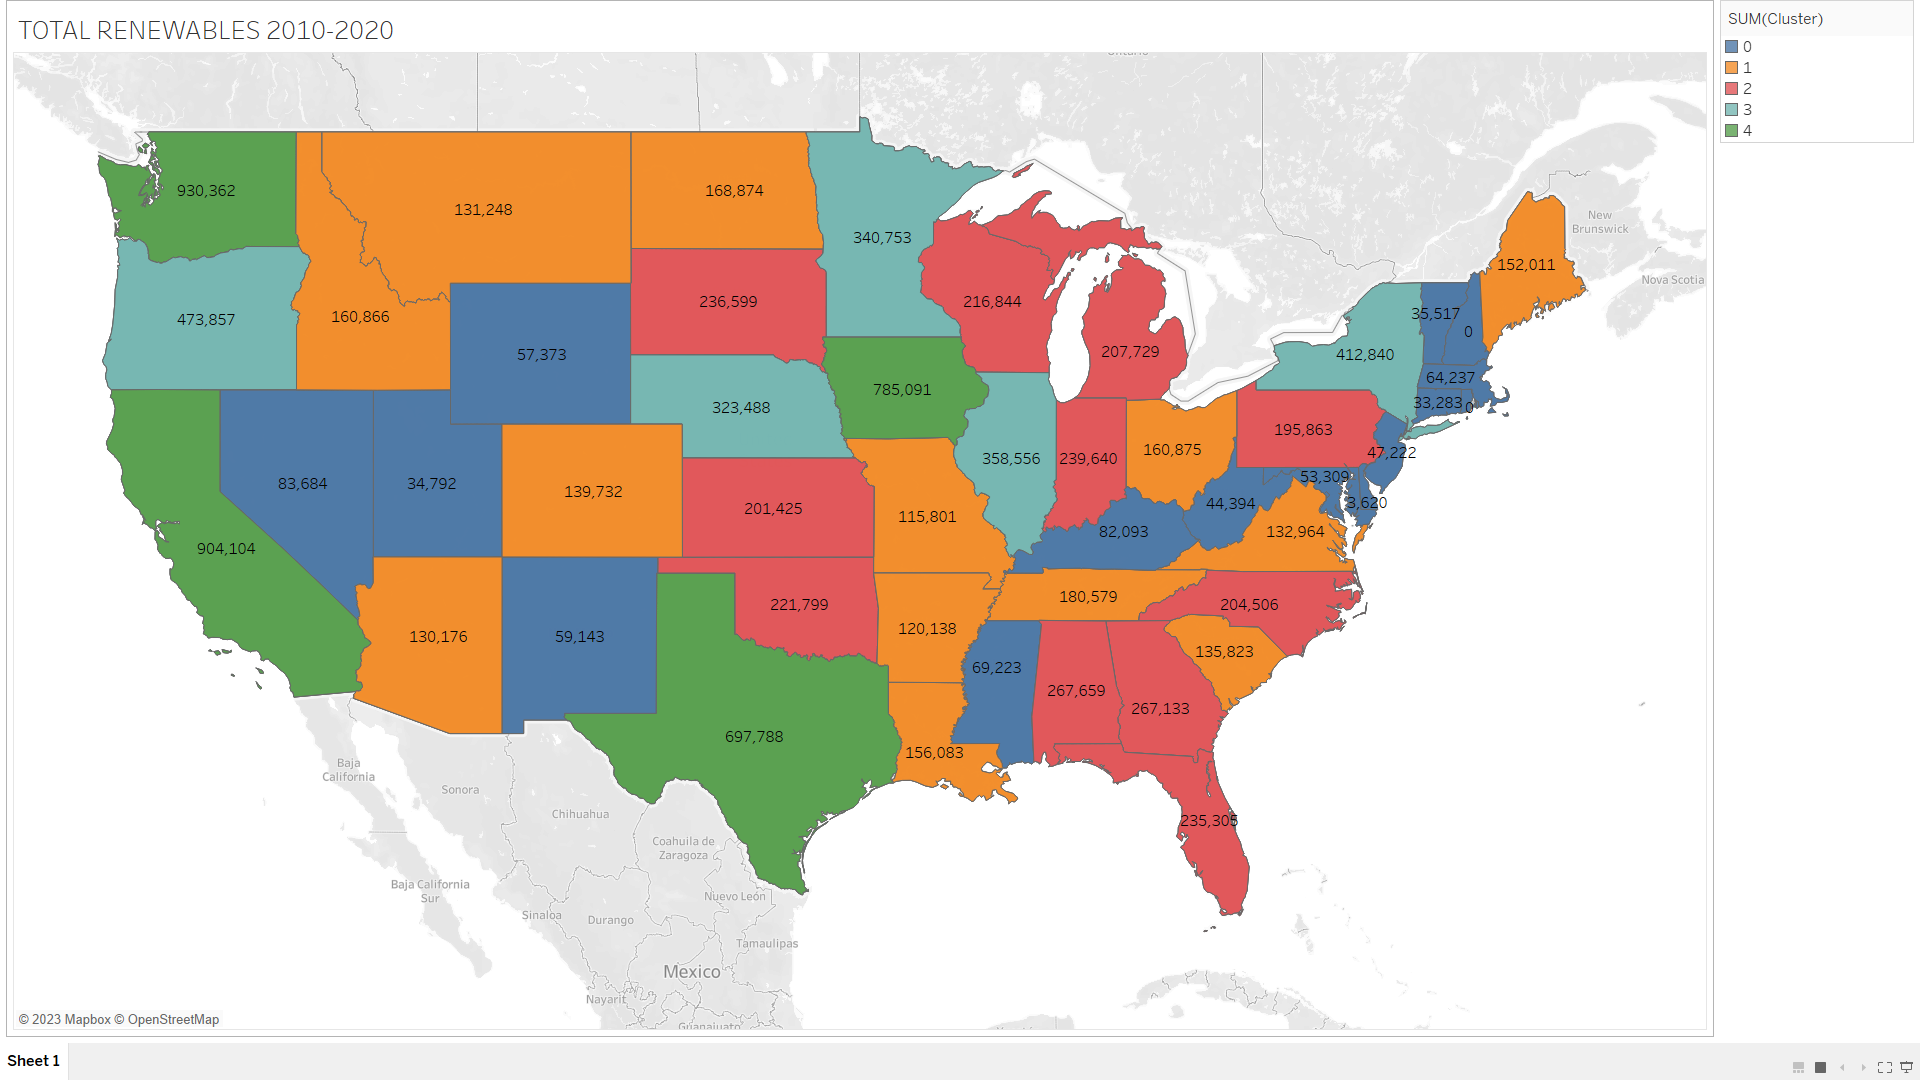

### Knowing the progess of the state with highest values from 2010-2020

### Progress of the states from 1960 to 1970

In [39]:
# Load the CSV file and read it
file_path = 'Renewables_Total_1960_1970.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['TX','IA','CA','WA']

# Find the Cluster  corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1960-1970 interval
print("Information for states in the 1960-1970 interval:")
print(state_info)


Information for states in the 1960-1970 interval:
    1960-1970  Cluster State Full Name
IA   15031.73        0            Iowa
TX   52494.45        1           Texas
CA  388302.18        3      California
WA  601290.09        4      Washington


### Progress of the states from 1970 to 1980

In [4]:
# Load the CSV file and read it
file_path = 'Renewables_Total_1970-1980.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['TX','IA','CA','WA','US']

# Find the Cluster  corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 1970-1980 interval:")
print(state_info)


Information for states in the 1970-1980 interval:
    1970-1980  Cluster State Full Name
IA    21311.8        0            Iowa
TX    75694.2        1           Texas
CA   527217.5        3      California
WA   899609.7        4      Washington


### Progress of the states from 1980 to 1990

In [5]:
# Load the CSV file and read it
file_path = 'Renewables_Total_1980-1990.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['TX','IA','CA','WA','US']

# Find the Cluster  corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1980-1990 interval
print("Information for states in the 1980-1990 interval:")
print(state_info)


Information for states in the 1980-1990 interval:
    1980-1990  Cluster State Full Name
IA    88862.1        1            Iowa
TX    98433.9        1           Texas
CA   640541.2        3      California
WA   947712.8        4      Washington


### Progress of the states from 1990 to 2000

In [6]:
# Load the CSV file and read it
file_path = 'Renewables_Total_1990-2000.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['TX','IA','CA','WA','US']

# Find the Cluster  corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1990-2000 interval
print("Information for states in the 1990-2000 interval:")
print(state_info)


Information for states in the 1990-2000 interval:
    1990-2000  Cluster State Full Name
IA   108701.1        1            Iowa
TX   113673.1        1           Texas
CA   750366.6        4      California
WA   947904.6        4      Washington


### Progress of the states from 2000 to 2010

In [7]:
# Load the CSV file and read it
file_path = 'Renewables_Total_2000-2010.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['TX','IA','CA','WA','US']

# Find the Cluster  corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 2000-2010 interval
print("Information for states in the 2000-2010 interval:")
print(state_info)


Information for states in the 2000-2010 interval:
    2000-2010  Cluster State Full Name
TX   194547.4        2           Texas
IA   293767.9        3            Iowa
CA   686119.6        4      California
WA   835187.6        4      Washington


### Progress of the states from 2010 to 2020

In [8]:
# Load the CSV file and read it
file_path = 'Renewables_Total_2010-2020.csv'
data = pd.read_csv(file_path, index_col=0)

# list of state abbreviations to retrieve information
state_abbreviations = ['TX','IA','CA','WA','US']

# Find the rows corresponding to the specified states
state_info = data[data.index.isin(state_abbreviations)]

# Print the information for the specified states in the 1970-1980 interval
print("Information for states in the 2010-2020 interval:")
print(state_info)



Information for states in the 2010-2020 interval:
    2010-2020  Cluster State Full Name
TX   697788.4        4           Texas
IA   785091.0        4            Iowa
CA   904103.7        4      California
WA   930361.5        4      Washington


### Plot the selected states

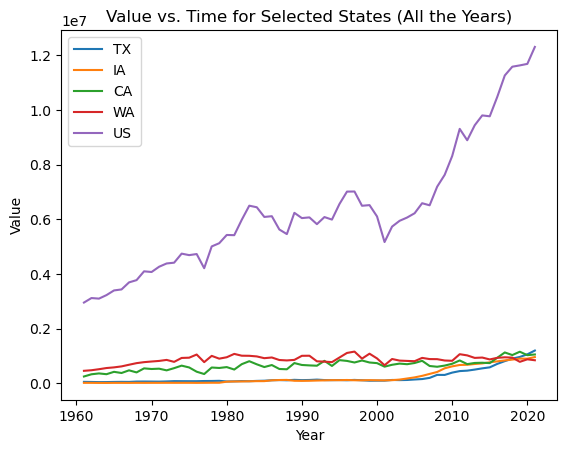

In [25]:
# Select only the 60 columns
Renewables_Total_60 = Renewables_Total.iloc[:, 1:62]

# Transpose the data to have years as rows and states as columns
Renewables_Total_60_T = Renewables_Total_60.transpose()

# Define the list of state abbreviations to plot
state_abbreviations = ['TX','IA','CA','WA','US']

# Plot data for the selected states with the correct legend label
for state in state_abbreviations:
    plt.plot(Renewables_Total_60_T.index, Renewables_Total_60_T[state], label=state)

# Add labels and legend
plt.xlabel('Year')
plt.ylabel('Value')
plt.title('Value vs. Time for Selected States (All the Years)')
plt.legend(loc='best')

# Show the plot
plt.show()

### FORECASTING USING DEEP LEARNING MODELS

### LSTM

In [41]:
# Reset column names to the first row (State/Year) and skip the last row (US)
Renewables.columns = Renewables_new.iloc[0]
Renewables_Total_USA = Renewables[1:]
Renewables_Total_USA_T = Renewables_Total_USA.transpose()

In [15]:
# Define the sequence length and other parameters
sequence_length_lstm = 40
accuracy_threshold_lstm = 0.01 

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {} 

for state in ['TX','IA','CA','WA','US']:
    # Extract the data for the selected state
    data = Renewables_Total_USA.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data for training.
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train an LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1)))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_lstm = []
    actual_values_lstm = []
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)

            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the root mean squared error (RMSE)
    rmse_lstm = np.sqrt(mse_lstm)

    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    # Forecast for 2023
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Forecast and Store predictions for 2019
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    # Forecast and Store predictions for 2020
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    # Forecast and Store predictions for 2021
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions for 2019
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}

for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Renewables_Total_USA.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 205ms/step
Epoch 1/20
23/23 [==============================] - 2s 7ms/step - loss: 0.1978
Epoch 2/20
23/23 [==============================] - 0s 7ms/step - loss: 0.1095
Epoch 3/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0569
Epoch 4/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0558
Epoch 5/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0605
Epoch 6/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0559
Epoch 7/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0537
Epoch 8/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0474
Epoch 9/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0487
Epoch 10/20
23/23 [==============================] - 0s 8ms/step - loss: 0.0462
Epoch 11/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0479
Epoch 12/20
23/23 [==============================] - 0s 10ms/step - loss: 

32/32 [==============================] - 0s 7ms/step - loss: 0.0196
Epoch 20/20
1/1 [==============================] - 0s 38ms/step
Epoch 1/20
33/33 [==============================] - 0s 7ms/step - loss: 0.0184
Epoch 2/20
33/33 [==============================] - 0s 7ms/step - loss: 0.0188
Epoch 3/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0220
Epoch 4/20
33/33 [==============================] - 0s 7ms/step - loss: 0.0226
Epoch 5/20
33/33 [==============================] - 0s 7ms/step - loss: 0.0239
Epoch 6/20
33/33 [==============================] - 0s 7ms/step - loss: 0.0188
Epoch 7/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0191
Epoch 8/20
33/33 [==============================] - 0s 7ms/step - loss: 0.0183
Epoch 9/20
33/33 [==============================] - 0s 7ms/step - loss: 0.0190
Epoch 10/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0193
Epoch 11/20
33/33 [==============================] - 0s 7ms/step - loss: 0.02

42/42 [==============================] - 0s 10ms/step - loss: 0.0142
Epoch 18/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0126
Epoch 19/20
42/42 [==============================] - 0s 9ms/step - loss: 0.0176
Epoch 20/20
1/1 [==============================] - 0s 25ms/step
Epoch 1/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0137
Epoch 2/20
43/43 [==============================] - 0s 7ms/step - loss: 0.0139
Epoch 3/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0135
Epoch 4/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0139
Epoch 5/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 6/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0140
Epoch 7/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 8/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0154
Epoch 9/20
43/43 [==============================] - 0s 10ms/step - loss: 0.

52/52 [==============================] - 1s 10ms/step - loss: 0.0110
Epoch 16/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0111
Epoch 17/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 18/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 19/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0122
Epoch 20/20
1/1 [==============================] - 0s 37ms/step
Epoch 1/20
53/53 [==============================] - 0s 7ms/step - loss: 0.0125
Epoch 2/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 3/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0111
Epoch 4/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0146
Epoch 5/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0115
Epoch 6/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 7/20
53/53 [==============================] - 0s 7ms/step - loss:

62/62 [==============================] - 1s 19ms/step - loss: 0.0106
Epoch 14/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0102
Epoch 15/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0123
Epoch 16/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0105
Epoch 17/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0106
Epoch 18/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0103
Epoch 19/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0093
Epoch 20/20
1/1 [==============================] - 1s 518ms/step
Epoch 1/20
23/23 [==============================] - 4s 21ms/step - loss: 0.3402
Epoch 2/20
23/23 [==============================] - 0s 20ms/step - loss: 0.1368
Epoch 3/20
23/23 [==============================] - 0s 19ms/step - loss: 0.0629
Epoch 4/20
23/23 [==============================] - 0s 17ms/step - loss: 0.0725
Epoch 5/20
23/23 [==============================] - 0s 19ms/

32/32 [==============================] - 0s 15ms/step - loss: 0.0213
Epoch 7/20
32/32 [==============================] - 1s 16ms/step - loss: 0.0237
Epoch 8/20
32/32 [==============================] - 1s 16ms/step - loss: 0.0278
Epoch 9/20
32/32 [==============================] - 1s 16ms/step - loss: 0.0258
Epoch 10/20
32/32 [==============================] - 0s 15ms/step - loss: 0.0219
Epoch 11/20
32/32 [==============================] - 1s 16ms/step - loss: 0.0209
Epoch 12/20
32/32 [==============================] - 0s 15ms/step - loss: 0.0214
Epoch 13/20
32/32 [==============================] - 0s 15ms/step - loss: 0.0232
Epoch 14/20
32/32 [==============================] - 1s 16ms/step - loss: 0.0196
Epoch 15/20
32/32 [==============================] - 1s 17ms/step - loss: 0.0240
Epoch 16/20
32/32 [==============================] - 0s 15ms/step - loss: 0.0212
Epoch 17/20
32/32 [==============================] - 1s 16ms/step - loss: 0.0207
Epoch 18/20
32/32 [========================

42/42 [==============================] - 1s 19ms/step - loss: 0.0156
Epoch 3/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0144
Epoch 4/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0173
Epoch 5/20
42/42 [==============================] - 1s 19ms/step - loss: 0.0152
Epoch 6/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0170
Epoch 7/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0169
Epoch 8/20
42/42 [==============================] - 1s 18ms/step - loss: 0.0164
Epoch 9/20
42/42 [==============================] - 1s 17ms/step - loss: 0.0164
Epoch 10/20
42/42 [==============================] - 1s 20ms/step - loss: 0.0149
Epoch 11/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0169
Epoch 12/20
42/42 [==============================] - 1s 21ms/step - loss: 0.0162
Epoch 13/20
42/42 [==============================] - 1s 19ms/step - loss: 0.0165
Epoch 14/20
42/42 [============================

51/51 [==============================] - 1s 20ms/step - loss: 0.0123
Epoch 20/20
1/1 [==============================] - 0s 59ms/step
Epoch 1/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0128
Epoch 2/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0140
Epoch 3/20
52/52 [==============================] - 1s 19ms/step - loss: 0.0129
Epoch 4/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0126
Epoch 5/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0113
Epoch 6/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0125
Epoch 7/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0122
Epoch 8/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0134
Epoch 9/20
52/52 [==============================] - 1s 15ms/step - loss: 0.0117
Epoch 10/20
52/52 [==============================] - 1s 16ms/step - loss: 0.0123
Epoch 11/20
52/52 [==============================] - 1s 15ms/step 

61/61 [==============================] - 1s 17ms/step - loss: 0.0122
Epoch 16/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0097
Epoch 17/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0092
Epoch 18/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0096
Epoch 19/20
61/61 [==============================] - 1s 17ms/step - loss: 0.0089
Epoch 20/20
1/1 [==============================] - 0s 60ms/step
Epoch 1/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0086
Epoch 2/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0112
Epoch 3/20
62/62 [==============================] - 1s 18ms/step - loss: 0.0110
Epoch 4/20
62/62 [==============================] - 1s 19ms/step - loss: 0.0116
Epoch 5/20
62/62 [==============================] - 1s 23ms/step - loss: 0.0098
Epoch 6/20
62/62 [==============================] - 1s 20ms/step - loss: 0.0087
Epoch 7/20
62/62 [==============================] - 1s 20ms/ste

31/31 [==============================] - 1s 18ms/step - loss: 0.0104
Epoch 9/20
31/31 [==============================] - 1s 18ms/step - loss: 0.0106
Epoch 10/20
31/31 [==============================] - 1s 18ms/step - loss: 0.0106
Epoch 11/20
31/31 [==============================] - 1s 18ms/step - loss: 0.0102
Epoch 12/20
31/31 [==============================] - 1s 18ms/step - loss: 0.0114
Epoch 13/20
31/31 [==============================] - 0s 16ms/step - loss: 0.0099
Epoch 14/20
31/31 [==============================] - 1s 19ms/step - loss: 0.0379
Epoch 15/20
31/31 [==============================] - 1s 18ms/step - loss: 0.0150
Epoch 16/20
31/31 [==============================] - 1s 19ms/step - loss: 0.0153
Epoch 17/20
31/31 [==============================] - 1s 18ms/step - loss: 0.0130
Epoch 18/20
31/31 [==============================] - 1s 19ms/step - loss: 0.0129
Epoch 19/20
31/31 [==============================] - 1s 17ms/step - loss: 0.0136
Epoch 20/20
1/1 [========================

41/41 [==============================] - 1s 17ms/step - loss: 0.0100
Epoch 5/20
41/41 [==============================] - 1s 19ms/step - loss: 0.0087
Epoch 6/20
41/41 [==============================] - 1s 18ms/step - loss: 0.0080
Epoch 7/20
41/41 [==============================] - 1s 19ms/step - loss: 0.0079
Epoch 8/20
41/41 [==============================] - 1s 19ms/step - loss: 0.0071
Epoch 9/20
41/41 [==============================] - 1s 19ms/step - loss: 0.0070
Epoch 10/20
41/41 [==============================] - 1s 18ms/step - loss: 0.0067
Epoch 11/20
41/41 [==============================] - 1s 19ms/step - loss: 0.0070
Epoch 12/20
41/41 [==============================] - 1s 19ms/step - loss: 0.0065
Epoch 13/20
41/41 [==============================] - 1s 19ms/step - loss: 0.0072
Epoch 14/20
41/41 [==============================] - 1s 20ms/step - loss: 0.0070
Epoch 15/20
41/41 [==============================] - 1s 18ms/step - loss: 0.0070
Epoch 16/20
41/41 [==========================

1/1 [==============================] - 0s 64ms/step
Epoch 1/20
51/51 [==============================] - 1s 18ms/step - loss: 0.0064
Epoch 2/20
51/51 [==============================] - 1s 19ms/step - loss: 0.0062
Epoch 3/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0073
Epoch 4/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0058
Epoch 5/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0058
Epoch 6/20
51/51 [==============================] - 1s 17ms/step - loss: 0.0057
Epoch 7/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0056
Epoch 8/20
51/51 [==============================] - 1s 15ms/step - loss: 0.0056
Epoch 9/20
51/51 [==============================] - 1s 19ms/step - loss: 0.0093
Epoch 10/20
51/51 [==============================] - 1s 20ms/step - loss: 0.0065
Epoch 11/20
51/51 [==============================] - 1s 16ms/step - loss: 0.0061
Epoch 12/20
51/51 [==============================] - 1s 16ms/step 

60/60 [==============================] - 1s 20ms/step - loss: 0.0061
Epoch 18/20
60/60 [==============================] - 1s 19ms/step - loss: 0.0077
Epoch 19/20
60/60 [==============================] - 1s 18ms/step - loss: 0.0057
Epoch 20/20
1/1 [==============================] - 0s 75ms/step
Epoch 1/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0069
Epoch 2/20
61/61 [==============================] - 1s 18ms/step - loss: 0.0067
Epoch 3/20
61/61 [==============================] - 1s 18ms/step - loss: 0.0055
Epoch 4/20
61/61 [==============================] - 1s 18ms/step - loss: 0.0058
Epoch 5/20
61/61 [==============================] - 1s 18ms/step - loss: 0.0058
Epoch 6/20
61/61 [==============================] - 1s 17ms/step - loss: 0.0057
Epoch 7/20
61/61 [==============================] - 1s 18ms/step - loss: 0.0060
Epoch 8/20
61/61 [==============================] - 1s 19ms/step - loss: 0.0083
Epoch 9/20
61/61 [==============================] - 1s 18ms/step 

30/30 [==============================] - 1s 17ms/step - loss: 0.0088
Epoch 11/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0081
Epoch 12/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0072
Epoch 13/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0080
Epoch 14/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0078
Epoch 15/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0074
Epoch 16/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0071
Epoch 17/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0069
Epoch 18/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0075
Epoch 19/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0086
Epoch 20/20
1/1 [==============================] - 0s 58ms/step
Epoch 1/20
31/31 [==============================] - 0s 16ms/step - loss: 0.0094
Epoch 2/20
31/31 [==============================] - 0s 15m

40/40 [==============================] - 1s 18ms/step - loss: 0.0124
Epoch 7/20
40/40 [==============================] - 1s 19ms/step - loss: 0.0113
Epoch 8/20
40/40 [==============================] - 1s 20ms/step - loss: 0.0108
Epoch 9/20
40/40 [==============================] - 1s 17ms/step - loss: 0.0096
Epoch 10/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0105
Epoch 11/20
40/40 [==============================] - 1s 19ms/step - loss: 0.0108
Epoch 12/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0114
Epoch 13/20
40/40 [==============================] - 1s 19ms/step - loss: 0.0096
Epoch 14/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0089
Epoch 15/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0101
Epoch 16/20
40/40 [==============================] - 1s 18ms/step - loss: 0.0080
Epoch 17/20
40/40 [==============================] - 1s 19ms/step - loss: 0.0103
Epoch 18/20
40/40 [========================

50/50 [==============================] - 1s 20ms/step - loss: 0.0053
Epoch 3/20
50/50 [==============================] - 1s 20ms/step - loss: 0.0051
Epoch 4/20
50/50 [==============================] - 1s 22ms/step - loss: 0.0071
Epoch 5/20
50/50 [==============================] - 1s 21ms/step - loss: 0.0061
Epoch 6/20
50/50 [==============================] - 1s 18ms/step - loss: 0.0056
Epoch 7/20
50/50 [==============================] - 1s 18ms/step - loss: 0.0047
Epoch 8/20
50/50 [==============================] - 1s 19ms/step - loss: 0.0049
Epoch 9/20
50/50 [==============================] - 1s 18ms/step - loss: 0.0055
Epoch 10/20
50/50 [==============================] - 1s 18ms/step - loss: 0.0052
Epoch 11/20
50/50 [==============================] - 1s 18ms/step - loss: 0.0075
Epoch 12/20
50/50 [==============================] - 1s 18ms/step - loss: 0.0052
Epoch 13/20
50/50 [==============================] - 1s 18ms/step - loss: 0.0052
Epoch 14/20
50/50 [============================

59/59 [==============================] - 1s 19ms/step - loss: 0.0083
Epoch 20/20
1/1 [==============================] - 0s 78ms/step
Epoch 1/20
60/60 [==============================] - 1s 19ms/step - loss: 0.0076
Epoch 2/20
60/60 [==============================] - 1s 19ms/step - loss: 0.0072
Epoch 3/20
60/60 [==============================] - 1s 20ms/step - loss: 0.0066
Epoch 4/20
60/60 [==============================] - 1s 19ms/step - loss: 0.0063
Epoch 5/20
60/60 [==============================] - 1s 19ms/step - loss: 0.0060
Epoch 6/20
60/60 [==============================] - 1s 18ms/step - loss: 0.0059
Epoch 7/20
60/60 [==============================] - 1s 19ms/step - loss: 0.0055
Epoch 8/20
60/60 [==============================] - 1s 21ms/step - loss: 0.0059
Epoch 9/20
60/60 [==============================] - 1s 21ms/step - loss: 0.0057
Epoch 10/20
60/60 [==============================] - 1s 20ms/step - loss: 0.0055
Epoch 11/20
60/60 [==============================] - 1s 18ms/step 

29/29 [==============================] - 1s 19ms/step - loss: 0.0143
Epoch 13/20
29/29 [==============================] - 1s 18ms/step - loss: 0.0131
Epoch 14/20
29/29 [==============================] - 1s 17ms/step - loss: 0.0143
Epoch 15/20
29/29 [==============================] - 1s 18ms/step - loss: 0.0174
Epoch 16/20
29/29 [==============================] - 1s 19ms/step - loss: 0.0186
Epoch 17/20
29/29 [==============================] - 1s 20ms/step - loss: 0.0149
Epoch 18/20
29/29 [==============================] - 1s 18ms/step - loss: 0.0134
Epoch 19/20
29/29 [==============================] - 1s 18ms/step - loss: 0.0135
Epoch 20/20
1/1 [==============================] - 0s 57ms/step
Epoch 1/20
30/30 [==============================] - 1s 17ms/step - loss: 0.0157
Epoch 2/20
30/30 [==============================] - 0s 16ms/step - loss: 0.0171
Epoch 3/20
30/30 [==============================] - 1s 18ms/step - loss: 0.0138
Epoch 4/20
30/30 [==============================] - 1s 18ms/

39/39 [==============================] - 1s 18ms/step - loss: 0.0103
Epoch 9/20
39/39 [==============================] - 1s 19ms/step - loss: 0.0091
Epoch 10/20
39/39 [==============================] - 1s 18ms/step - loss: 0.0101
Epoch 11/20
39/39 [==============================] - 1s 17ms/step - loss: 0.0097
Epoch 12/20
39/39 [==============================] - 1s 19ms/step - loss: 0.0086
Epoch 13/20
39/39 [==============================] - 1s 18ms/step - loss: 0.0092
Epoch 14/20
39/39 [==============================] - 1s 19ms/step - loss: 0.0090
Epoch 15/20
39/39 [==============================] - 1s 19ms/step - loss: 0.0088
Epoch 16/20
39/39 [==============================] - 1s 18ms/step - loss: 0.0096
Epoch 17/20
39/39 [==============================] - 1s 19ms/step - loss: 0.0111
Epoch 18/20
39/39 [==============================] - 1s 18ms/step - loss: 0.0099
Epoch 19/20
39/39 [==============================] - 1s 18ms/step - loss: 0.0096
Epoch 20/20
1/1 [========================

49/49 [==============================] - 1s 17ms/step - loss: 0.0087
Epoch 5/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0094
Epoch 6/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0087
Epoch 7/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0084
Epoch 8/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0103
Epoch 9/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0089
Epoch 10/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0095
Epoch 11/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0091
Epoch 12/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0086
Epoch 13/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0081
Epoch 14/20
49/49 [==============================] - 1s 17ms/step - loss: 0.0085
Epoch 15/20
49/49 [==============================] - 1s 18ms/step - loss: 0.0073
Epoch 16/20
49/49 [==========================

1/1 [==============================] - 0s 63ms/step
Epoch 1/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0065
Epoch 2/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0072
Epoch 3/20
59/59 [==============================] - 1s 19ms/step - loss: 0.0068
Epoch 4/20
59/59 [==============================] - 1s 19ms/step - loss: 0.0065
Epoch 5/20
59/59 [==============================] - 1s 19ms/step - loss: 0.0066
Epoch 6/20
59/59 [==============================] - 1s 19ms/step - loss: 0.0084
Epoch 7/20
59/59 [==============================] - 1s 19ms/step - loss: 0.0074
Epoch 8/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0067
Epoch 9/20
59/59 [==============================] - 1s 18ms/step - loss: 0.0071
Epoch 10/20
59/59 [==============================] - 1s 19ms/step - loss: 0.0077
Epoch 11/20
59/59 [==============================] - 1s 19ms/step - loss: 0.0065
Epoch 12/20
59/59 [==============================] - 1s 19ms/step 

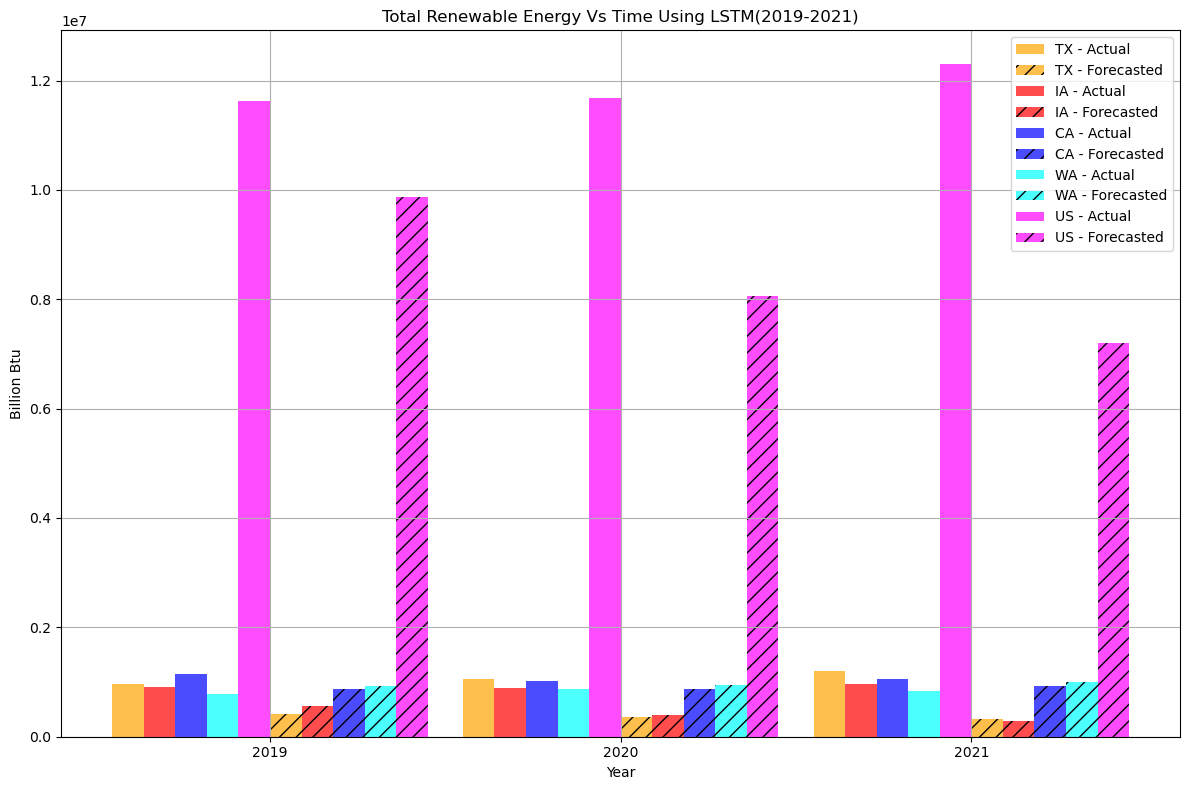

In [59]:
# Define the list of state abbreviations to plot
state_abbreviations =  ['TX','IA','CA','WA','US']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Renewables_Total_USA_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.09

# Define colors for each state
state_colors = {'CA': 'blue', 'IA': 'green', 'TX': 'orange', 'IA': 'red', 'WA': 'cyan', 'US': 'magenta'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_lstm[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Total Renewable Energy Vs Time Using LSTM (2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

In [14]:
# Define the sequence length and other parameters
sequence_length_lstm = 50
accuracy_threshold_lstm = 0.01 

# Loop through each selected state
state_mse_lstm = {}
state_rmse_lstm = {}
state_forecasts_lstm = {}
state_predictions_lstm = {}  # New dictionary to store predictions for each state

for state in ['TX','IA','CA','WA','US']:
    # Extract the data for the selected state
    data = Renewables_Total_USA.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for LSTM
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_lstm):
        seq = scaled_data[i:i + sequence_length_lstm]
        target = scaled_data[i + sequence_length_lstm]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data for training.
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train an LSTM model
    model_lstm = Sequential()
    model_lstm.add(LSTM(units=50, activation='relu', input_shape=(sequence_length_lstm, 1)))
    model_lstm.add(Dense(units=1))
    model_lstm.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_lstm = []
    actual_values_lstm = []
    predictions_lstm = []

    # Iterate through the forecast years
    current_sequence_lstm = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
        actual_value_lstm = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_lstm.reshape(1, sequence_length_lstm, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_lstm)
        mse_lstm = mean_squared_error([actual_value_lstm], [forecast_lstm[0]])
        model_lstm.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_lstm[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_lstm > accuracy_threshold_lstm:
            continue
        else:
            forecasts_lstm.append(forecast_lstm[0])
            actual_values_lstm.append(actual_value_lstm)

            # Store the prediction for the current year
            prediction_lstm = scaler.inverse_transform(forecast_lstm.reshape(-1, 1))[0][0]
            predictions_lstm.append(prediction_lstm)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_lstm = scaler.inverse_transform(np.array(forecasts_lstm).reshape(-1, 1))
    actual_values_lstm = scaler.inverse_transform(np.array(actual_values_lstm).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_lstm = mean_squared_error(actual_values_lstm, forecasts_lstm)

    # Calculate the root mean squared error (RMSE)
    rmse_lstm = np.sqrt(mse_lstm)

    state_mse_lstm[state] = mse_lstm
    state_rmse_lstm[state] = rmse_lstm

    # Forecast for 2022 and 2023
    forecast_2022_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2022_lstm[0])
    forecast_2023_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_lstm = scaler.inverse_transform(forecast_2022_lstm.reshape(-1, 1))[0][0]
    forecast_2023_lstm = scaler.inverse_transform(forecast_2023_lstm.reshape(-1, 1))[0][0]
    state_forecasts_lstm[state] = {'2022': forecast_2022_lstm, '2023': forecast_2023_lstm}

    # Store predictions for 2019, 2020, and 2021
    forecast_2019_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2019_lstm[0])
    forecast_2020_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2020_lstm[0])
    forecast_2021_lstm = model_lstm.predict(current_sequence_lstm.reshape(1, sequence_length_lstm, 1))
    current_sequence_lstm = np.append(current_sequence_lstm[1:], forecast_2021_lstm[0])

    # Inverse transform the predictions to the original scale
    prediction_2019_lstm = scaler.inverse_transform(forecast_2019_lstm.reshape(-1, 1))[0][0]
    prediction_2020_lstm = scaler.inverse_transform(forecast_2020_lstm.reshape(-1, 1))[0][0]
    prediction_2021_lstm = scaler.inverse_transform(forecast_2021_lstm.reshape(-1, 1))[0][0]
    state_predictions_lstm[state] = {'2019': prediction_2019_lstm, '2020': prediction_2020_lstm, '2021': prediction_2021_lstm}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_lstm.items():
    print(f"MSE for {state} (LSTM): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_lstm.items():
    print(f"RMSE for {state} (LSTM): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_lstm.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_lstm.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year
state_accuracies_lstm = {}

for state in state_predictions_lstm:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Renewables_Total_USA.loc[state].loc[int(year)]
        predicted_value = state_predictions_lstm[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_lstm[state] = accuracies_state

# Print accuracies for each state and year
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States:")
for state, accuracies_state in state_accuracies_lstm.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 1s 1s/step
Epoch 1/20
13/13 [==============================] - 1s 9ms/step - loss: 0.3219
Epoch 2/20
13/13 [==============================] - 0s 8ms/step - loss: 0.1805
Epoch 3/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0853
Epoch 4/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0600
Epoch 5/20
13/13 [==============================] - 0s 9ms/step - loss: 0.0604
Epoch 6/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0617
Epoch 7/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0630
Epoch 8/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0708
Epoch 9/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0611
Epoch 10/20
13/13 [==============================] - 0s 11ms/step - loss: 0.0589
Epoch 11/20
13/13 [==============================] - 0s 10ms/step - loss: 0.0570
Epoch 12/20
13/13 [==============================] - 0s 12ms/step - loss

1/1 [==============================] - 0s 30ms/step
Epoch 1/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0503
Epoch 2/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0431
Epoch 3/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0462
Epoch 4/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0437
Epoch 5/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0420
Epoch 6/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0417
Epoch 7/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0492
Epoch 8/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0409
Epoch 9/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0414
Epoch 10/20
18/18 [==============================] - 0s 8ms/step - loss: 0.0430
Epoch 11/20
18/18 [==============================] - 0s 9ms/step - loss: 0.0400
Epoch 12/20
18/18 [==============================] - 0s 8ms/step - loss: 0.04

27/27 [==============================] - 0s 11ms/step - loss: 0.0247
Epoch 19/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0228
Epoch 20/20
1/1 [==============================] - 0s 38ms/step
Epoch 1/20
28/28 [==============================] - 0s 13ms/step - loss: 0.0229
Epoch 2/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0242
Epoch 3/20
28/28 [==============================] - 0s 12ms/step - loss: 0.0238
Epoch 4/20
28/28 [==============================] - 0s 12ms/step - loss: 0.0220
Epoch 5/20
28/28 [==============================] - 0s 13ms/step - loss: 0.0225
Epoch 6/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0238
Epoch 7/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0241
Epoch 8/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0215
Epoch 9/20
28/28 [==============================] - 0s 11ms/step - loss: 0.0244
Epoch 10/20
28/28 [==============================] - 0s 10ms/step 

32/32 [==============================] - 0s 8ms/step - loss: 0.0206
Epoch 18/20
32/32 [==============================] - 0s 8ms/step - loss: 0.0178
Epoch 19/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0252
Epoch 2/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0271
Epoch 3/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0309
Epoch 4/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0194
Epoch 5/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 6/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0225
Epoch 7/20
33/33 [==============================] - 0s 11ms/step - loss: 0.0214
Epoch 8/20
33/33 [==============================] - 0s 8ms/step - loss: 0.0187
Epoch 9/20
33/33 [==============================] - 0s 9ms/step - loss: 0.

42/42 [==============================] - 0s 9ms/step - loss: 0.0138
Epoch 16/20
42/42 [==============================] - 1s 12ms/step - loss: 0.0144
Epoch 17/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0140
Epoch 18/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0143
Epoch 19/20
42/42 [==============================] - 1s 13ms/step - loss: 0.0170
Epoch 20/20
1/1 [==============================] - 0s 21ms/step
Epoch 1/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0132
Epoch 2/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0141
Epoch 3/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0147
Epoch 4/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0142
Epoch 5/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0142
Epoch 6/20
43/43 [==============================] - 1s 12ms/step - loss: 0.0142
Epoch 7/20
43/43 [==============================] - 1s 12ms/step - l

47/47 [==============================] - 0s 8ms/step - loss: 0.0131
Epoch 15/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0132
Epoch 16/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 17/20
47/47 [==============================] - 0s 11ms/step - loss: 0.0130
Epoch 18/20
47/47 [==============================] - 1s 13ms/step - loss: 0.0124
Epoch 19/20
47/47 [==============================] - 1s 12ms/step - loss: 0.0140
Epoch 20/20
1/1 [==============================] - 0s 26ms/step
Epoch 1/20
48/48 [==============================] - 0s 10ms/step - loss: 0.0116
Epoch 2/20
48/48 [==============================] - 0s 9ms/step - loss: 0.0120
Epoch 3/20
48/48 [==============================] - 0s 8ms/step - loss: 0.0135
Epoch 4/20
48/48 [==============================] - 1s 11ms/step - loss: 0.0258
Epoch 5/20
48/48 [==============================] - 1s 11ms/step - loss: 0.0149
Epoch 6/20
48/48 [==============================] - 0s 9ms/step - l

57/57 [==============================] - 1s 9ms/step - loss: 0.0111
Epoch 13/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 14/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 15/20
57/57 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 16/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0100
Epoch 17/20
57/57 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 18/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0106
Epoch 19/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0107
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
58/58 [==============================] - 1s 11ms/step - loss: 0.0124
Epoch 2/20
58/58 [==============================] - 1s 11ms/step - loss: 0.0111
Epoch 3/20
58/58 [==============================] - 1s 9ms/step - loss: 0.0102
Epoch 4/20
58/58 [==============================] - 0s 8ms/step - los

62/62 [==============================] - 1s 10ms/step - loss: 0.0116
Epoch 12/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0111
Epoch 13/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0113
Epoch 14/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0110
Epoch 15/20
62/62 [==============================] - 1s 10ms/step - loss: 0.0107
Epoch 16/20
62/62 [==============================] - 1s 12ms/step - loss: 0.0104
Epoch 17/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0104
Epoch 18/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0104
Epoch 19/20
62/62 [==============================] - 1s 11ms/step - loss: 0.0120
Epoch 20/20
1/1 [==============================] - 0s 266ms/step
Epoch 1/20
13/13 [==============================] - 1s 8ms/step - loss: 0.4721
Epoch 2/20
13/13 [==============================] - 0s 11ms/step - loss: 0.2523
Epoch 3/20
13/13 [==============================] - 0s 11ms

22/22 [==============================] - 0s 8ms/step - loss: 0.0354
Epoch 6/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0317
Epoch 7/20
22/22 [==============================] - 0s 12ms/step - loss: 0.0400
Epoch 8/20
22/22 [==============================] - 0s 13ms/step - loss: 0.0316
Epoch 9/20
22/22 [==============================] - 0s 12ms/step - loss: 0.0379
Epoch 10/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0319
Epoch 11/20
22/22 [==============================] - 0s 10ms/step - loss: 0.0310
Epoch 12/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0350
Epoch 13/20
22/22 [==============================] - 0s 9ms/step - loss: 0.0326
Epoch 14/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0302
Epoch 15/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0382
Epoch 16/20
22/22 [==============================] - 0s 8ms/step - loss: 0.0318
Epoch 17/20
22/22 [==============================] -

27/27 [==============================] - 0s 12ms/step - loss: 0.0278
Epoch 5/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0277
Epoch 6/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0238
Epoch 7/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0242
Epoch 8/20
27/27 [==============================] - 0s 12ms/step - loss: 0.0266
Epoch 9/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0274
Epoch 10/20
27/27 [==============================] - 0s 13ms/step - loss: 0.0269
Epoch 11/20
27/27 [==============================] - 0s 13ms/step - loss: 0.0285
Epoch 12/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0251
Epoch 13/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0234
Epoch 14/20
27/27 [==============================] - 0s 9ms/step - loss: 0.0239
Epoch 15/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0274
Epoch 16/20
27/27 [===========================

37/37 [==============================] - 0s 12ms/step - loss: 0.0194
Epoch 2/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0182
Epoch 3/20
37/37 [==============================] - 0s 12ms/step - loss: 0.0186
Epoch 4/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0214
Epoch 5/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 6/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0281
Epoch 7/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0208
Epoch 8/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0202
Epoch 9/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0218
Epoch 10/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0181
Epoch 11/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0187
Epoch 12/20
37/37 [==============================] - 0s 12ms/step - loss: 0.0192
Epoch 13/20
37/37 [==============================]

46/46 [==============================] - 0s 10ms/step - loss: 0.0148
Epoch 20/20
1/1 [==============================] - 0s 21ms/step
Epoch 1/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0146
Epoch 2/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0158
Epoch 3/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 4/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0148
Epoch 5/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0162
Epoch 6/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0172
Epoch 7/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0172
Epoch 8/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0149
Epoch 9/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0154
Epoch 10/20
47/47 [==============================] - 0s 10ms/step - loss: 0.0159
Epoch 11/20
47/47 [==============================] - 0s 8ms/step - loss: 0.

56/56 [==============================] - 1s 9ms/step - loss: 0.0114
Epoch 18/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 19/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0117
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0125
Epoch 2/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0140
Epoch 3/20
57/57 [==============================] - 1s 10ms/step - loss: 0.0113
Epoch 4/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0115
Epoch 5/20
57/57 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 6/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0115
Epoch 7/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0117
Epoch 8/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0128
Epoch 9/20
57/57 [==============================] - 0s 8ms/step - loss: 0.

16/16 [==============================] - 0s 8ms/step - loss: 0.0333
Epoch 13/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0367
Epoch 14/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0325
Epoch 15/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0336
Epoch 16/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0336
Epoch 17/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0390
Epoch 18/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0357
Epoch 19/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0339
Epoch 20/20
1/1 [==============================] - 0s 20ms/step
Epoch 1/20
17/17 [==============================] - 0s 9ms/step - loss: 0.0390
Epoch 2/20
17/17 [==============================] - 0s 8ms/step - loss: 0.0371
Epoch 3/20
17/17 [==============================] - 0s 8ms/step - loss: 0.0324
Epoch 4/20
17/17 [==============================] - 0s 9ms/step - los

26/26 [==============================] - 0s 10ms/step - loss: 0.0208
Epoch 11/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0186
Epoch 12/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 13/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0192
Epoch 14/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0190
Epoch 15/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0200
Epoch 16/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0198
Epoch 17/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 18/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0181
Epoch 19/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 20/20
1/1 [==============================] - 0s 20ms/step
Epoch 1/20
27/27 [==============================] - 0s 11ms/step - loss: 0.0221
Epoch 2/20
27/27 [==============================] - 0s 13ms/st

31/31 [==============================] - 0s 11ms/step - loss: 0.0156
Epoch 10/20
31/31 [==============================] - 0s 12ms/step - loss: 0.0166
Epoch 11/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0158
Epoch 12/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0167
Epoch 13/20
31/31 [==============================] - 0s 11ms/step - loss: 0.0152
Epoch 14/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0153
Epoch 15/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0144
Epoch 16/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0141
Epoch 17/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0144
Epoch 18/20
31/31 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 19/20
31/31 [==============================] - 0s 9ms/step - loss: 0.0152
Epoch 20/20
1/1 [==============================] - 0s 44ms/step
Epoch 1/20
32/32 [==============================] - 0s 13ms

41/41 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 8/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 9/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 10/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 11/20
41/41 [==============================] - 0s 10ms/step - loss: 0.0105
Epoch 12/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 13/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0107
Epoch 14/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 15/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 16/20
41/41 [==============================] - 0s 8ms/step - loss: 0.0105
Epoch 17/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 18/20
41/41 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 19/20
41/41 [==============================] - 

51/51 [==============================] - 0s 9ms/step - loss: 0.0085
Epoch 6/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 7/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 8/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 9/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 10/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0087
Epoch 11/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 12/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0083
Epoch 13/20
51/51 [==============================] - 0s 8ms/step - loss: 0.0087
Epoch 14/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 15/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 16/20
51/51 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 17/20
51/51 [==============================] - 0s 

61/61 [==============================] - 1s 11ms/step - loss: 0.0079
Epoch 4/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0075
Epoch 5/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0077
Epoch 6/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0077
Epoch 7/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0082
Epoch 8/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0077
Epoch 9/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0083
Epoch 10/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0072
Epoch 11/20
61/61 [==============================] - 1s 8ms/step - loss: 0.0071
Epoch 12/20
61/61 [==============================] - 1s 10ms/step - loss: 0.0072
Epoch 13/20
61/61 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 14/20
61/61 [==============================] - 1s 9ms/step - loss: 0.0080
Epoch 15/20
61/61 [==============================] - 1s 

1/1 [==============================] - 0s 39ms/step
Epoch 1/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0134
Epoch 2/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0131
Epoch 3/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0117
Epoch 4/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 5/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 6/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 7/20
16/16 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 8/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 9/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 10/20
16/16 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 11/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0111
Epoch 12/20
16/16 [==============================] - 0s 10ms/step - loss: 0

25/25 [==============================] - 0s 10ms/step - loss: 0.0084
Epoch 19/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 20/20
1/1 [==============================] - 0s 35ms/step
Epoch 1/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0101
Epoch 2/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 3/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0104
Epoch 4/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 5/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 6/20
26/26 [==============================] - 0s 7ms/step - loss: 0.0092
Epoch 7/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0091
Epoch 8/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 9/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0106
Epoch 10/20
26/26 [==============================] - 0s 10ms/step - loss: 0.

35/35 [==============================] - 0s 8ms/step - loss: 0.0081
Epoch 17/20
35/35 [==============================] - 0s 10ms/step - loss: 0.0075
Epoch 18/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0087
Epoch 19/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0098
Epoch 20/20
1/1 [==============================] - 0s 20ms/step
Epoch 1/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0083
Epoch 2/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 3/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0081
Epoch 4/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0074
Epoch 5/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0073
Epoch 6/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0065
Epoch 7/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0084
Epoch 8/20
36/36 [==============================] - 0s 9ms/step - loss: 0

45/45 [==============================] - 0s 11ms/step - loss: 8.6412e-04
Epoch 15/20
45/45 [==============================] - 0s 8ms/step - loss: 8.1058e-04
Epoch 16/20
45/45 [==============================] - 0s 8ms/step - loss: 8.3069e-04
Epoch 17/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0028
Epoch 18/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 19/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0016
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0010
Epoch 2/20
46/46 [==============================] - 0s 8ms/step - loss: 8.9470e-04
Epoch 3/20
46/46 [==============================] - 0s 10ms/step - loss: 9.0512e-04
Epoch 4/20
46/46 [==============================] - 0s 8ms/step - loss: 7.3954e-04
Epoch 5/20
46/46 [==============================] - 0s 8ms/step - loss: 8.4493e-04
Epoch 6/20
46/46 [=========================

55/55 [==============================] - 0s 8ms/step - loss: 7.0548e-04
Epoch 8/20
55/55 [==============================] - 1s 10ms/step - loss: 6.9429e-04
Epoch 9/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0011
Epoch 10/20
55/55 [==============================] - 0s 8ms/step - loss: 9.1068e-04
Epoch 11/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0010
Epoch 12/20
55/55 [==============================] - 0s 9ms/step - loss: 6.5479e-04
Epoch 13/20
55/55 [==============================] - 1s 10ms/step - loss: 6.5609e-04
Epoch 14/20
55/55 [==============================] - 1s 10ms/step - loss: 7.2293e-04
Epoch 15/20
55/55 [==============================] - 1s 10ms/step - loss: 5.9079e-04
Epoch 16/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 17/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0020
Epoch 18/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0012
Epoch 19/20
55/55 [===

14/14 [==============================] - 0s 10ms/step - loss: 0.0600
Epoch 18/20
14/14 [==============================] - 0s 11ms/step - loss: 0.0615
Epoch 19/20
14/14 [==============================] - 0s 10ms/step - loss: 0.0601
Epoch 20/20
1/1 [==============================] - 0s 27ms/step
Epoch 1/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0806
Epoch 2/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0657
Epoch 3/20
15/15 [==============================] - 0s 8ms/step - loss: 0.0680
Epoch 4/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0829
Epoch 5/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0657
Epoch 6/20
15/15 [==============================] - 0s 9ms/step - loss: 0.0613
Epoch 7/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0557
Epoch 8/20
15/15 [==============================] - 0s 10ms/step - loss: 0.0557
Epoch 9/20
15/15 [==============================] - 0s 10ms/step - los

24/24 [==============================] - 0s 9ms/step - loss: 0.0195
Epoch 16/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0222
Epoch 17/20
24/24 [==============================] - 0s 10ms/step - loss: 0.0207
Epoch 18/20
24/24 [==============================] - 0s 8ms/step - loss: 0.0215
Epoch 19/20
24/24 [==============================] - 0s 9ms/step - loss: 0.0204
Epoch 20/20
1/1 [==============================] - 0s 24ms/step
Epoch 1/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0169
Epoch 2/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0224
Epoch 3/20
25/25 [==============================] - 0s 11ms/step - loss: 0.0254
Epoch 4/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0243
Epoch 5/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0269
Epoch 6/20
25/25 [==============================] - 0s 9ms/step - loss: 0.0244
Epoch 7/20
25/25 [==============================] - 0s 8ms/step - loss:

34/34 [==============================] - 0s 10ms/step - loss: 0.0140
Epoch 14/20
34/34 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 15/20
34/34 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 16/20
34/34 [==============================] - 0s 8ms/step - loss: 0.0148
Epoch 17/20
34/34 [==============================] - 0s 9ms/step - loss: 0.0140
Epoch 18/20
34/34 [==============================] - 0s 8ms/step - loss: 0.0132
Epoch 19/20
34/34 [==============================] - 0s 8ms/step - loss: 0.0131
Epoch 20/20
1/1 [==============================] - 0s 23ms/step
Epoch 1/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0130
Epoch 2/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0159
Epoch 3/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0153
Epoch 4/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0136
Epoch 5/20
35/35 [==============================] - 0s 8ms/step - loss:

44/44 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 12/20
44/44 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 13/20
44/44 [==============================] - 0s 8ms/step - loss: 0.0132
Epoch 14/20
44/44 [==============================] - 0s 8ms/step - loss: 0.0115
Epoch 15/20
44/44 [==============================] - 0s 8ms/step - loss: 0.0124
Epoch 16/20
44/44 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 17/20
44/44 [==============================] - 0s 9ms/step - loss: 0.0115
Epoch 18/20
44/44 [==============================] - 0s 8ms/step - loss: 0.0124
Epoch 19/20
44/44 [==============================] - 0s 9ms/step - loss: 0.0133
Epoch 20/20
1/1 [==============================] - 0s 21ms/step
Epoch 1/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0108
Epoch 2/20
45/45 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 3/20
45/45 [==============================] - 0s 8ms/step - loss

54/54 [==============================] - 0s 8ms/step - loss: 0.0085
Epoch 10/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 11/20
54/54 [==============================] - 0s 9ms/step - loss: 0.0093
Epoch 12/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 13/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 14/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 15/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 16/20
54/54 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 17/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0087
Epoch 18/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0082
Epoch 19/20
54/54 [==============================] - 0s 8ms/step - loss: 0.0083
Epoch 20/20
1/1 [==============================] - 0s 21ms/step
Epoch 1/20
55/55 [==============================] - 0s 8ms/step - lo

### GRU

In [46]:
# Define the sequence length and other parameters
sequence_length_gru = 40
accuracy_threshold_gru = 0.01  

# Loop through each selected state
state_mse_gru = {}
state_rmse_gru = {}
state_forecasts_gru = {}
state_predictions_gru = {} 

for state in ['TX','IA','CA','WA','US']:
    # Extract the data for the selected state
    data = Renewables_Total_USA.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for GRU
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_gru):
        seq = scaled_data[i:i + sequence_length_gru]
        target = scaled_data[i + sequence_length_gru]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data beyond 1969 for training
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train a GRU model
    model_gru = Sequential()
    model_gru.add(GRU(units=50, activation='relu', input_shape=(sequence_length_gru, 1)))
    model_gru.add(Dense(units=1))
    model_gru.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_gru = []
    actual_values_gru = []
    predictions_gru = []

    # Iterate through the forecast years
    current_sequence_gru = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
        actual_value_gru = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_gru.reshape(1, sequence_length_gru, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_gru)
        mse_gru = mean_squared_error([actual_value_gru], [forecast_gru[0]])
        model_gru.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_gru = np.append(current_sequence_gru[1:], forecast_gru[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_gru > accuracy_threshold_gru:
            continue
        else:
            forecasts_gru.append(forecast_gru[0])
            actual_values_gru.append(actual_value_gru)

            # Store the prediction for the current year
            prediction_gru = scaler.inverse_transform(forecast_gru.reshape(-1, 1))[0][0]
            predictions_gru.append(prediction_gru)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_gru = scaler.inverse_transform(np.array(forecasts_gru).reshape(-1, 1))
    actual_values_gru = scaler.inverse_transform(np.array(actual_values_gru).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_gru = mean_squared_error(actual_values_gru, forecasts_gru)

    # Calculate the root mean squared error (RMSE)
    rmse_gru = np.sqrt(mse_gru)

    state_mse_gru[state] = mse_gru
    state_rmse_gru[state] = rmse_gru

    # Forecast for 2022 and 2023
    forecast_2022_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2022_gru[0])
    forecast_2023_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))

    # Inverse transform the forecasts to the original scale
    forecast_2022_gru = scaler.inverse_transform(forecast_2022_gru.reshape(-1, 1))[0][0]
    forecast_2023_gru = scaler.inverse_transform(forecast_2023_gru.reshape(-1, 1))[0][0]
    # Store predictions for 2022 and 2023
    state_forecasts_gru[state] = {'2022': forecast_2022_gru, '2023': forecast_2023_gru}

    # Forecast and Store predictions for 2019
    forecast_2019_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2019_gru[0])
    # Forecast and Store predictions for 2020
    forecast_2020_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2020_gru[0])
    # Forecast and Store predictions for 2021
    forecast_2021_gru = model_gru.predict(current_sequence_gru.reshape(1, sequence_length_gru, 1))
    current_sequence_gru = np.append(current_sequence_gru[1:], forecast_2021_gru[0])

    # Inverse transform the predictions for 2019
    prediction_2019_gru = scaler.inverse_transform(forecast_2019_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2020
    prediction_2020_gru = scaler.inverse_transform(forecast_2020_gru.reshape(-1, 1))[0][0]
    # Inverse transform the predictions for 2021
    prediction_2021_gru = scaler.inverse_transform(forecast_2021_gru.reshape(-1, 1))[0][0]
    state_predictions_gru[state] = {'2019': prediction_2019_gru, '2020': prediction_2020_gru, '2021': prediction_2021_gru}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_gru.items():
    print(f"MSE for {state} (GRU): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_gru.items():
    print(f"RMSE for {state} (GRU): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_gru.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_gru.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for GRU
state_accuracies_gru = {}

for state in state_predictions_gru:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Renewables_Total_USA.loc[state].loc[int(year)]
        predicted_value = state_predictions_gru[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_gru[state] = accuracies_state

# Print accuracies for each state and year for GRU
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (GRU):")
for state, accuracies_state in state_accuracies_gru.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")


1/1 [==============================] - 0s 256ms/step
Epoch 1/20
23/23 [==============================] - 2s 9ms/step - loss: 0.1447
Epoch 2/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0781
Epoch 3/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0550
Epoch 4/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0500
Epoch 5/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0489
Epoch 6/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0467
Epoch 7/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0450
Epoch 8/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0438
Epoch 9/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0427
Epoch 10/20
23/23 [==============================] - 0s 10ms/step - loss: 0.0421
Epoch 11/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0407
Epoch 12/20
23/23 [==============================] - 0s 10ms/step - loss

32/32 [==============================] - 0s 8ms/step - loss: 0.0196
Epoch 20/20
1/1 [==============================] - 0s 34ms/step
Epoch 1/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0203
Epoch 2/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0184
Epoch 3/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0173
Epoch 4/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0187
Epoch 5/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0169
Epoch 6/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0181
Epoch 7/20
33/33 [==============================] - 0s 10ms/step - loss: 0.0183
Epoch 8/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0182
Epoch 9/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0183
Epoch 10/20
33/33 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 11/20
33/33 [==============================] - 0s 8ms/step - loss: 0.

42/42 [==============================] - 0s 10ms/step - loss: 0.0150
Epoch 18/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0141
Epoch 19/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0149
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0157
Epoch 2/20
43/43 [==============================] - 0s 10ms/step - loss: 0.0156
Epoch 3/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0154
Epoch 4/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0147
Epoch 5/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0156
Epoch 6/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0161
Epoch 7/20
43/43 [==============================] - 0s 8ms/step - loss: 0.0144
Epoch 8/20
43/43 [==============================] - 0s 9ms/step - loss: 0.0142
Epoch 9/20
43/43 [==============================] - 0s 9ms/step - loss:

52/52 [==============================] - 1s 10ms/step - loss: 0.0114
Epoch 16/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 17/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 18/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0112
Epoch 19/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 20/20
1/1 [==============================] - 0s 35ms/step
Epoch 1/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0116
Epoch 2/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0114
Epoch 3/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0145
Epoch 4/20
53/53 [==============================] - 0s 9ms/step - loss: 0.0121
Epoch 5/20
53/53 [==============================] - 1s 10ms/step - loss: 0.0106
Epoch 6/20
53/53 [==============================] - 0s 8ms/step - loss: 0.0118
Epoch 7/20
53/53 [==============================] - 0s 9ms/step - loss: 

62/62 [==============================] - 1s 9ms/step - loss: 0.0110
Epoch 14/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0098
Epoch 15/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0100
Epoch 16/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0089
Epoch 17/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0091
Epoch 18/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0108
Epoch 19/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0097
Epoch 20/20
1/1 [==============================] - 0s 285ms/step
Epoch 1/20
23/23 [==============================] - 2s 8ms/step - loss: 0.1988
Epoch 2/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0574
Epoch 3/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0475
Epoch 4/20
23/23 [==============================] - 0s 9ms/step - loss: 0.0505
Epoch 5/20
23/23 [==============================] - 0s 9ms/step - loss:

32/32 [==============================] - 0s 11ms/step - loss: 0.0228
Epoch 9/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0227
Epoch 10/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0228
Epoch 11/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0212
Epoch 12/20
32/32 [==============================] - 0s 11ms/step - loss: 0.0220
Epoch 13/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0220
Epoch 14/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0226
Epoch 15/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0221
Epoch 16/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0229
Epoch 17/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0229
Epoch 18/20
32/32 [==============================] - 0s 10ms/step - loss: 0.0214
Epoch 19/20
32/32 [==============================] - 0s 9ms/step - loss: 0.0219
Epoch 20/20
1/1 [==========================

42/42 [==============================] - 0s 10ms/step - loss: 0.0162
Epoch 7/20
42/42 [==============================] - 1s 13ms/step - loss: 0.0152
Epoch 8/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0156
Epoch 9/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0147
Epoch 10/20
42/42 [==============================] - 0s 12ms/step - loss: 0.0154
Epoch 11/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0168
Epoch 12/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0146
Epoch 13/20
42/42 [==============================] - 1s 13ms/step - loss: 0.0164
Epoch 14/20
42/42 [==============================] - 1s 12ms/step - loss: 0.0151
Epoch 15/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0172
Epoch 16/20
42/42 [==============================] - 0s 10ms/step - loss: 0.0151
Epoch 17/20
42/42 [==============================] - 0s 11ms/step - loss: 0.0133
Epoch 18/20
42/42 [========================

52/52 [==============================] - 1s 11ms/step - loss: 0.0108
Epoch 5/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0113
Epoch 6/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0127
Epoch 7/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0108
Epoch 8/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0116
Epoch 9/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 10/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0118
Epoch 11/20
52/52 [==============================] - 0s 8ms/step - loss: 0.0166
Epoch 12/20
52/52 [==============================] - 1s 11ms/step - loss: 0.0120
Epoch 13/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0131
Epoch 14/20
52/52 [==============================] - 0s 9ms/step - loss: 0.0111
Epoch 15/20
52/52 [==============================] - 1s 10ms/step - loss: 0.0116
Epoch 16/20
52/52 [==============================] -

62/62 [==============================] - 0s 8ms/step - loss: 0.0127
Epoch 3/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0124
Epoch 4/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0100
Epoch 5/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0105
Epoch 6/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0101
Epoch 7/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0099
Epoch 8/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0104
Epoch 9/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0118
Epoch 10/20
62/62 [==============================] - 1s 9ms/step - loss: 0.0105
Epoch 11/20
62/62 [==============================] - 0s 8ms/step - loss: 0.0101
Epoch 12/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0104
Epoch 13/20
62/62 [==============================] - 1s 8ms/step - loss: 0.0098
Epoch 14/20
62/62 [==============================] - 1s 9ms

26/26 [==============================] - 0s 8ms/step - loss: 0.0159
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0147
Epoch 2/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 3/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0157
Epoch 4/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0164
Epoch 5/20
27/27 [==============================] - 0s 10ms/step - loss: 0.0155
Epoch 6/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0153
Epoch 7/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0147
Epoch 8/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0155
Epoch 9/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0152
Epoch 10/20
27/27 [==============================] - 0s 8ms/step - loss: 0.0149
Epoch 11/20
27/27 [==============================] - 0s 8ms/step - loss: 0.

36/36 [==============================] - 0s 8ms/step - loss: 0.0113
Epoch 18/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0119
Epoch 19/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0107
Epoch 20/20
1/1 [==============================] - 0s 35ms/step
Epoch 1/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 2/20
37/37 [==============================] - 0s 11ms/step - loss: 0.0116
Epoch 3/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0104
Epoch 4/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 5/20
37/37 [==============================] - 0s 9ms/step - loss: 0.0102
Epoch 6/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 7/20
37/37 [==============================] - 0s 8ms/step - loss: 0.0102
Epoch 8/20
37/37 [==============================] - 0s 10ms/step - loss: 0.0114
Epoch 9/20
37/37 [==============================] - 0s 8ms/step - loss: 0.

46/46 [==============================] - 0s 8ms/step - loss: 0.0103
Epoch 16/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0098
Epoch 17/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0089
Epoch 18/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0094
Epoch 19/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 20/20
1/1 [==============================] - 0s 21ms/step
Epoch 1/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0099
Epoch 2/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0086
Epoch 3/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0082
Epoch 4/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0087
Epoch 5/20
47/47 [==============================] - 0s 9ms/step - loss: 0.0086
Epoch 6/20
47/47 [==============================] - 0s 8ms/step - loss: 0.0091
Epoch 7/20
47/47 [==============================] - 0s 9ms/step - loss: 0.

56/56 [==============================] - 0s 9ms/step - loss: 0.0057
Epoch 14/20
56/56 [==============================] - 1s 10ms/step - loss: 0.0052
Epoch 15/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0092
Epoch 16/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0096
Epoch 17/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0079
Epoch 18/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0057
Epoch 19/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0051
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0055
Epoch 2/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0054
Epoch 3/20
57/57 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 4/20
57/57 [==============================] - 1s 9ms/step - loss: 0.0085
Epoch 5/20
57/57 [==============================] - 0s 8ms/step - loss:

26/26 [==============================] - 0s 8ms/step - loss: 0.0143
Epoch 9/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0139
Epoch 10/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 11/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0129
Epoch 12/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0128
Epoch 13/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0131
Epoch 14/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0124
Epoch 15/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0126
Epoch 16/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0132
Epoch 17/20
26/26 [==============================] - 0s 11ms/step - loss: 0.0132
Epoch 18/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0128
Epoch 19/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0135
Epoch 20/20
1/1 [==============================] -

36/36 [==============================] - 0s 10ms/step - loss: 0.0113
Epoch 7/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 8/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0095
Epoch 9/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0096
Epoch 10/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 11/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 12/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0092
Epoch 13/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0097
Epoch 14/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 15/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0089
Epoch 16/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 17/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0092
Epoch 18/20
36/36 [==============================] 

46/46 [==============================] - 0s 9ms/step - loss: 0.0026
Epoch 5/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0026
Epoch 6/20
46/46 [==============================] - 0s 10ms/step - loss: 0.0024
Epoch 7/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0023
Epoch 8/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0037
Epoch 9/20
46/46 [==============================] - 0s 10ms/step - loss: 0.0028
Epoch 10/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0047
Epoch 11/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0048
Epoch 12/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 13/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0027
Epoch 14/20
46/46 [==============================] - 0s 10ms/step - loss: 0.0021
Epoch 15/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0019
Epoch 16/20
46/46 [==============================] - 0

56/56 [==============================] - 0s 8ms/step - loss: 0.0043
Epoch 3/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0031
Epoch 4/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0039
Epoch 5/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0021
Epoch 6/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0029
Epoch 7/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0022
Epoch 8/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 9/20
56/56 [==============================] - 1s 9ms/step - loss: 0.0026
Epoch 10/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0022
Epoch 11/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0023
Epoch 12/20
56/56 [==============================] - 1s 10ms/step - loss: 0.0024
Epoch 13/20
56/56 [==============================] - 0s 8ms/step - loss: 0.0021
Epoch 14/20
56/56 [==============================] - 1s 9m

25/25 [==============================] - 0s 8ms/step - loss: 0.0190
Epoch 18/20
25/25 [==============================] - 0s 10ms/step - loss: 0.0195
Epoch 19/20
25/25 [==============================] - 0s 8ms/step - loss: 0.0173
Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0185
Epoch 2/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0190
Epoch 3/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0172
Epoch 4/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0177
Epoch 5/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0178
Epoch 6/20
26/26 [==============================] - 0s 10ms/step - loss: 0.0173
Epoch 7/20
26/26 [==============================] - 0s 8ms/step - loss: 0.0175
Epoch 8/20
26/26 [==============================] - 0s 9ms/step - loss: 0.0170
Epoch 9/20
26/26 [==============================] - 0s 8ms/step - loss: 0.

35/35 [==============================] - 0s 8ms/step - loss: 0.0123
Epoch 16/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0111
Epoch 17/20
35/35 [==============================] - 0s 10ms/step - loss: 0.0115
Epoch 18/20
35/35 [==============================] - 0s 9ms/step - loss: 0.0113
Epoch 19/20
35/35 [==============================] - 0s 8ms/step - loss: 0.0119
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 2/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 3/20
36/36 [==============================] - 0s 10ms/step - loss: 0.0121
Epoch 4/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0114
Epoch 5/20
36/36 [==============================] - 0s 8ms/step - loss: 0.0116
Epoch 6/20
36/36 [==============================] - 0s 9ms/step - loss: 0.0117
Epoch 7/20
36/36 [==============================] - 0s 8ms/step - loss: 

45/45 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 14/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 15/20
45/45 [==============================] - 0s 9ms/step - loss: 0.0096
Epoch 16/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0098
Epoch 17/20
45/45 [==============================] - 0s 9ms/step - loss: 0.0100
Epoch 18/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0094
Epoch 19/20
45/45 [==============================] - 0s 8ms/step - loss: 0.0096
Epoch 20/20
1/1 [==============================] - 0s 25ms/step
Epoch 1/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0090
Epoch 2/20
46/46 [==============================] - 0s 9ms/step - loss: 0.0099
Epoch 3/20
46/46 [==============================] - 0s 8ms/step - loss: 0.0093
Epoch 4/20
46/46 [==============================] - 1s 12ms/step - loss: 0.0099
Epoch 5/20
46/46 [==============================] - 1s 11ms/step - loss

55/55 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 12/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0076
Epoch 13/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0069
Epoch 14/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0075
Epoch 15/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0070
Epoch 16/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0071
Epoch 17/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0074
Epoch 18/20
55/55 [==============================] - 0s 9ms/step - loss: 0.0087
Epoch 19/20
55/55 [==============================] - 0s 8ms/step - loss: 0.0075
Epoch 20/20
1/1 [==============================] - 0s 33ms/step
Epoch 1/20
56/56 [==============================] - 0s 9ms/step - loss: 0.0080
Epoch 2/20
56/56 [==============================] - 1s 10ms/step - loss: 0.0076
Epoch 3/20
56/56 [==============================] - 0s 8ms/step - los

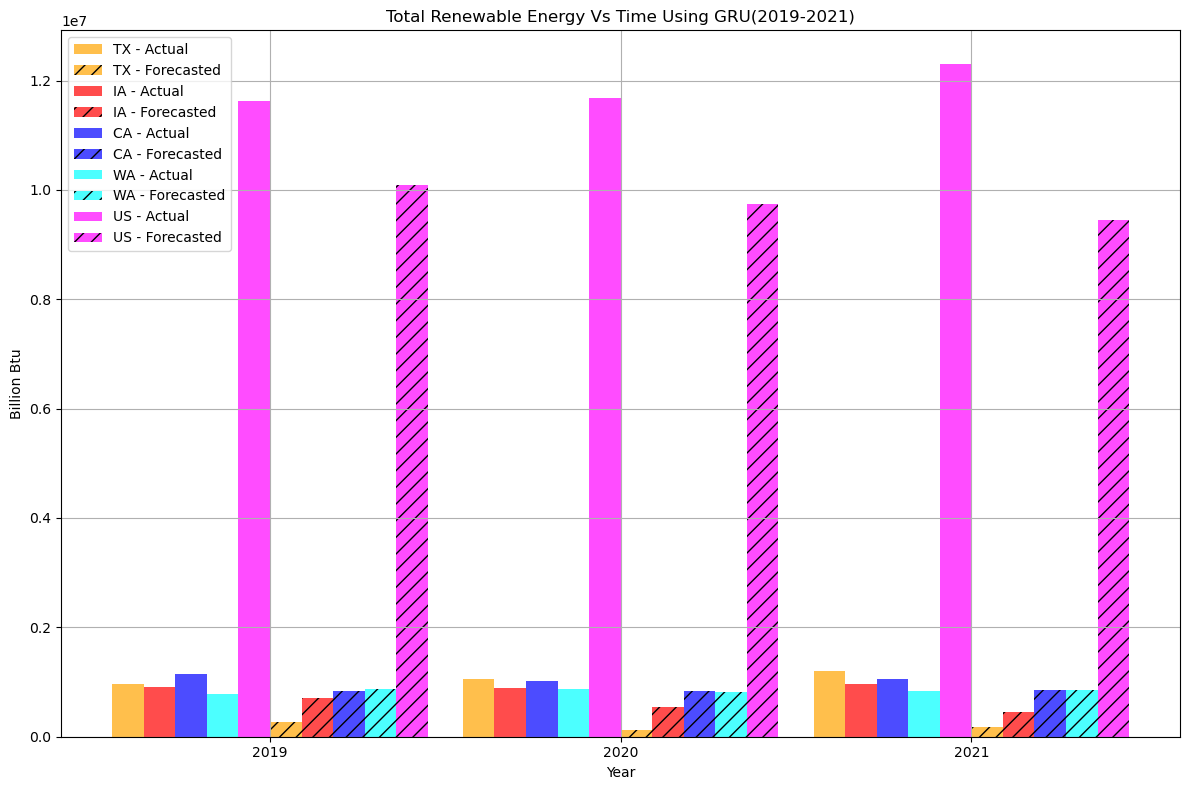

In [58]:
# Define the list of state abbreviations to plot
state_abbreviations =  ['TX','IA','CA','WA','US']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Renewables_Total_USA_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.09

# Define colors for each state
state_colors = {'CA': 'blue', 'IA': 'green', 'TX': 'orange', 'IA': 'red', 'WA': 'cyan', 'US': 'magenta'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_gru[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Total Renewable Energy Vs Time Using GRU(2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### CNN

In [48]:
# Define the sequence length and other parameters
sequence_length_cnn = 40
accuracy_threshold_cnn = 0.01 

# Loop through each selected state
state_mse_cnn = {}
state_rmse_cnn = {}
state_forecasts_cnn = {}
state_predictions_cnn = {}  

for state in ['TX','IA','CA','WA','US']:
    # Extract the data for the selected state
    data = Renewables_Total_USA.loc[state].values

    # Normalize the data
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(data.reshape(-1, 1))

    # Create sequences for CNN
    sequences = []
    targets = []
    for i in range(len(scaled_data) - sequence_length_cnn):
        seq = scaled_data[i:i + sequence_length_cnn]
        target = scaled_data[i + sequence_length_cnn]
        sequences.append(seq)
        targets.append(target)
    x_train, y_train = np.array(sequences), np.array(targets)

    # Include data beyond 1969 for training
    x_train_full, y_train_full = x_train[:len(x_train)], y_train[:len(y_train)]

    # Create and train a CNN model
    model_cnn = Sequential()
    model_cnn.add(Conv1D(filters=32, kernel_size=3, activation='relu', input_shape=(sequence_length_cnn, 1)))
    model_cnn.add(MaxPooling1D(pool_size=2))
    model_cnn.add(Flatten())
    model_cnn.add(Dense(units=50, activation='relu'))
    model_cnn.add(Dense(units=1))
    model_cnn.compile(optimizer='adam', loss='mean_squared_error')

    # Lists to store forecasts, actual values, and predictions
    forecasts_cnn = []
    actual_values_cnn = []
    predictions_cnn = []

    # Iterate through the forecast years
    current_sequence_cnn = x_train_full[-1]
    for year in range(len(x_train), len(scaled_data)):
        forecast_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
        actual_value_cnn = scaled_data[year]
        x_train_full = np.append(x_train_full, current_sequence_cnn.reshape(1, sequence_length_cnn, 1), axis=0)
        y_train_full = np.append(y_train_full, actual_value_cnn)
        mse_cnn = mean_squared_error([actual_value_cnn], [forecast_cnn[0]])
        model_cnn.fit(x_train_full, y_train_full, epochs=20, batch_size=1)
        current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_cnn[0])

        # If prediction accuracy is below the threshold, retrain and predict again
        if mse_cnn > accuracy_threshold_cnn:
            continue
        else:
            forecasts_cnn.append(forecast_cnn[0])
            actual_values_cnn.append(actual_value_cnn)

            # Store the prediction for the current year
            prediction_cnn = scaler.inverse_transform(forecast_cnn.reshape(-1, 1))[0][0]
            predictions_cnn.append(prediction_cnn)

    # Inverse transform the forecasts and actual values to the original scale
    forecasts_cnn = scaler.inverse_transform(np.array(forecasts_cnn).reshape(-1, 1))
    actual_values_cnn = scaler.inverse_transform(np.array(actual_values_cnn).reshape(-1, 1))

    # Calculate the mean squared error (MSE) for the forecasts
    mse_cnn = mean_squared_error(actual_values_cnn, forecasts_cnn)

    # Calculate the root mean squared error (RMSE)
    rmse_cnn = np.sqrt(mse_cnn)

    state_mse_cnn[state] = mse_cnn
    state_rmse_cnn[state] = rmse_cnn

    # Forecast for 2022
    forecast_2022_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2022_cnn[0])
    # Forecast for 2023
    forecast_2023_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    # Inverse transform the forecasts to the original scale for 2022
    forecast_2022_cnn = scaler.inverse_transform(forecast_2022_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the forecasts to the original scale for 2023
    forecast_2023_cnn = scaler.inverse_transform(forecast_2023_cnn.reshape(-1, 1))[0][0]
    state_forecasts_cnn[state] = {'2022': forecast_2022_cnn, '2023': forecast_2023_cnn}
    # Store predictions for 2019
    forecast_2019_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2019_cnn[0])
    # Store predictions for 2020
    forecast_2020_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2020_cnn[0])
    # Store predictions for 2021
    forecast_2021_cnn = model_cnn.predict(current_sequence_cnn.reshape(1, sequence_length_cnn, 1))
    current_sequence_cnn = np.append(current_sequence_cnn[1:], forecast_2021_cnn[0])
    # Inverse transform the predictions to the original scale for 2019
    prediction_2019_cnn = scaler.inverse_transform(forecast_2019_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2020
    prediction_2020_cnn = scaler.inverse_transform(forecast_2020_cnn.reshape(-1, 1))[0][0]
    # Inverse transform the predictions to the original scale for 2021
    prediction_2021_cnn = scaler.inverse_transform(forecast_2021_cnn.reshape(-1, 1))[0][0]
    # store the values for 2019,2020 and 2021
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}
    state_predictions_cnn[state] = {'2019': prediction_2019_cnn, '2020': prediction_2020_cnn, '2021': prediction_2021_cnn}

# Print MSE and RMSE for all states
print("\nMean Squared Error (MSE) for All States:")
for state, mse_value in state_mse_cnn.items():
    print(f"MSE for {state} (CNN): {mse_value:.2f}")

print("\nRoot Mean Squared Error (RMSE) for All States:")
for state, rmse_value in state_rmse_cnn.items():
    print(f"RMSE for {state} (CNN): {rmse_value:.2f}")

# Print forecasts for all states
print("\nForecasts for All States:")
for state, forecasts in state_forecasts_cnn.items():
    print(f"Forecasts for {state} - 2022: {forecasts['2022']:.2f}, 2023: {forecasts['2023']:.2f}")

# Print predictions for 2019, 2020, and 2021 for all states
print("\nPredictions for 2019, 2020, and 2021 for All States:")
for state, predictions in state_predictions_cnn.items():
    print(f"Predictions for {state} - 2019: {predictions['2019']:.2f}, 2020: {predictions['2020']:.2f}, 2021: {predictions['2021']:.2f}")

# Calculate and store accuracy for each state and year for CNN
state_accuracies_cnn = {}

for state in state_predictions_cnn:
    accuracies_state = {'2019': [], '2020': [], '2021': []}
    for year in ['2019', '2020', '2021']:
        actual_value = Renewables_Total_USA.loc[state].loc[int(year)]
        predicted_value = state_predictions_cnn[state][year]
        accuracy = 100 - abs((predicted_value - actual_value) / actual_value) * 100
        accuracies_state[year].append(accuracy)
    state_accuracies_cnn[state] = accuracies_state

# Print accuracies for each state and year for CNN
print("\nAccuracies for Predictions (2019, 2020, 2021) - Individual States (CNN):")
for state, accuracies_state in state_accuracies_cnn.items():
    for year, accuracies in accuracies_state.items():
        average_accuracy = sum(accuracies) / len(accuracies)
        print(f"Average Accuracy for {state} - {year}: {average_accuracy:.2f}%")

1/1 [==============================] - 0s 250ms/step
Epoch 1/20
23/23 [==============================] - 1s 4ms/step - loss: 0.0794
Epoch 2/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0480
Epoch 3/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0446
Epoch 4/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0411
Epoch 5/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0426
Epoch 6/20
23/23 [==============================] - 0s 4ms/step - loss: 0.0394
Epoch 7/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0571
Epoch 8/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0422
Epoch 9/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0333
Epoch 10/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0379
Epoch 11/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0364
Epoch 12/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0

32/32 [==============================] - 0s 3ms/step - loss: 0.0158
Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0181
Epoch 2/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0185
Epoch 3/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 4/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0151
Epoch 5/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0184
Epoch 6/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 7/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0159
Epoch 8/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0164
Epoch 9/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 10/20
33/33 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 11/20
33/33 [==============================] - 0s 3ms/step - loss: 0.01

42/42 [==============================] - 0s 4ms/step - loss: 0.0131
Epoch 18/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0119
Epoch 19/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0118
Epoch 2/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 3/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0127
Epoch 4/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 5/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 6/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0130
Epoch 7/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0129
Epoch 8/20
43/43 [==============================] - 0s 3ms/step - loss: 0.0131
Epoch 9/20
43/43 [==============================] - 0s 4ms/step - loss: 0.01

52/52 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 16/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 17/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 18/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 19/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 20/20
1/1 [==============================] - 0s 40ms/step
Epoch 1/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0109
Epoch 2/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0121
Epoch 3/20
53/53 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 4/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 5/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0097
Epoch 6/20
53/53 [==============================] - 0s 2ms/step - loss: 0.0102
Epoch 7/20
53/53 [==============================] - 0s 3ms/step - loss: 0.

62/62 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 14/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 15/20
62/62 [==============================] - 0s 4ms/step - loss: 0.0081
Epoch 16/20
62/62 [==============================] - 0s 4ms/step - loss: 0.0084
Epoch 17/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 18/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 19/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0087
Epoch 20/20
1/1 [==============================] - 0s 108ms/step
Epoch 1/20
23/23 [==============================] - 1s 3ms/step - loss: 0.1055
Epoch 2/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0782
Epoch 3/20
23/23 [==============================] - 0s 3ms/step - loss: 0.0739
Epoch 4/20
23/23 [==============================] - 0s 2ms/step - loss: 0.0520
Epoch 5/20
23/23 [==============================] - 0s 3ms/step - loss:

32/32 [==============================] - 0s 3ms/step - loss: 0.0153
Epoch 9/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0166
Epoch 10/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0232
Epoch 11/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0172
Epoch 12/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0176
Epoch 13/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0195
Epoch 14/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 15/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 16/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0178
Epoch 17/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 18/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0175
Epoch 19/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0159
Epoch 20/20
1/1 [==============================] - 0s

42/42 [==============================] - 0s 3ms/step - loss: 0.0117
Epoch 7/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0124
Epoch 8/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0119
Epoch 9/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 10/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0162
Epoch 11/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0126
Epoch 12/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0134
Epoch 13/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0130
Epoch 14/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 15/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0136
Epoch 16/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0132
Epoch 17/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0131
Epoch 18/20
42/42 [==============================] - 0s

52/52 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 5/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 6/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0092
Epoch 7/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 8/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 9/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0105
Epoch 10/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0104
Epoch 11/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 12/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0107
Epoch 13/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0101
Epoch 14/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 15/20
52/52 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 16/20
52/52 [==============================] - 0s 2

62/62 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 3/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 4/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0088
Epoch 5/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0081
Epoch 6/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0079
Epoch 7/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 8/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0083
Epoch 9/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 10/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0089
Epoch 11/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0077
Epoch 12/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0076
Epoch 13/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0079
Epoch 14/20
62/62 [==============================] - 0s 3ms

31/31 [==============================] - 0s 3ms/step - loss: 0.0035
Epoch 19/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 20/20
1/1 [==============================] - 0s 26ms/step
Epoch 1/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 2/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 3/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0036
Epoch 4/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0036
Epoch 5/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 6/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0034
Epoch 7/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0037
Epoch 8/20
32/32 [==============================] - 0s 2ms/step - loss: 0.0044
Epoch 9/20
32/32 [==============================] - 0s 3ms/step - loss: 0.0051
Epoch 10/20
32/32 [==============================] - 0s 2ms/step - loss: 0.00

41/41 [==============================] - 0s 2ms/step - loss: 0.0023
Epoch 17/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 18/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 19/20
41/41 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 20/20
1/1 [==============================] - 0s 29ms/step
Epoch 1/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 2/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0031
Epoch 3/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0033
Epoch 4/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 5/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0026
Epoch 6/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0030
Epoch 7/20
42/42 [==============================] - 0s 2ms/step - loss: 0.0028
Epoch 8/20
42/42 [==============================] - 0s 3ms/step - loss: 0.0

51/51 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 15/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 16/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0019
Epoch 17/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 18/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0021
Epoch 19/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 20/20
1/1 [==============================] - 0s 23ms/step
Epoch 1/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 2/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 3/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0022
Epoch 4/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0020
Epoch 5/20
52/52 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 6/20
52/52 [==============================] - 0s 3ms/step - loss: 0

61/61 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 13/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 14/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0019
Epoch 15/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 16/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 17/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 18/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 19/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 20/20
1/1 [==============================] - 0s 32ms/step
Epoch 1/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 2/20
62/62 [==============================] - 0s 2ms/step - loss: 0.0021
Epoch 3/20
62/62 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 4/20
62/62 [==============================] - 0s 2ms/step - loss:

31/31 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 8/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0027
Epoch 9/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 10/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0025
Epoch 11/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0026
Epoch 12/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0012
Epoch 13/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 14/20
31/31 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 15/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 16/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0018
Epoch 17/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 18/20
31/31 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 19/20
31/31 [==============================] - 0

41/41 [==============================] - 0s 3ms/step - loss: 0.0016
Epoch 6/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 7/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 8/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 9/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0018
Epoch 10/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 11/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0010
Epoch 12/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0012
Epoch 13/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 14/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0014
Epoch 15/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0015
Epoch 16/20
41/41 [==============================] - 0s 3ms/step - loss: 0.0013
Epoch 17/20
41/41 [==============================] - 0s 

1/1 [==============================] - 0s 40ms/step
Epoch 1/20
51/51 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 2/20
51/51 [==============================] - 0s 4ms/step - loss: 8.0749e-04
Epoch 3/20
51/51 [==============================] - 0s 4ms/step - loss: 8.2780e-04
Epoch 4/20
51/51 [==============================] - 0s 3ms/step - loss: 0.0011
Epoch 5/20
51/51 [==============================] - 0s 4ms/step - loss: 8.7562e-04
Epoch 6/20
51/51 [==============================] - 0s 3ms/step - loss: 7.9563e-04
Epoch 7/20
51/51 [==============================] - 0s 3ms/step - loss: 7.9582e-04
Epoch 8/20
51/51 [==============================] - 0s 4ms/step - loss: 7.3406e-04
Epoch 9/20
51/51 [==============================] - 0s 4ms/step - loss: 7.7712e-04
Epoch 10/20
51/51 [==============================] - 0s 4ms/step - loss: 0.0010
Epoch 11/20
51/51 [==============================] - 0s 3ms/step - loss: 8.7453e-04
Epoch 12/20
51/51 [==========================

60/60 [==============================] - 0s 2ms/step - loss: 7.3729e-04
Epoch 12/20
60/60 [==============================] - 0s 3ms/step - loss: 7.1983e-04
Epoch 13/20
60/60 [==============================] - 0s 2ms/step - loss: 6.5295e-04
Epoch 14/20
60/60 [==============================] - 0s 3ms/step - loss: 7.3208e-04
Epoch 15/20
60/60 [==============================] - 0s 3ms/step - loss: 6.7091e-04
Epoch 16/20
60/60 [==============================] - 0s 2ms/step - loss: 7.3501e-04
Epoch 17/20
60/60 [==============================] - 0s 3ms/step - loss: 7.4169e-04
Epoch 18/20
60/60 [==============================] - 0s 3ms/step - loss: 7.9717e-04
Epoch 19/20
60/60 [==============================] - 0s 2ms/step - loss: 6.8450e-04
Epoch 20/20
1/1 [==============================] - 0s 30ms/step
Epoch 1/20
61/61 [==============================] - 0s 3ms/step - loss: 0.0017
Epoch 2/20
61/61 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 3/20
61/61 [================

30/30 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 5/20
30/30 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 6/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 7/20
30/30 [==============================] - 0s 2ms/step - loss: 0.0106
Epoch 8/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0098
Epoch 9/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0108
Epoch 10/20
30/30 [==============================] - 0s 2ms/step - loss: 0.0107
Epoch 11/20
30/30 [==============================] - 0s 2ms/step - loss: 0.0108
Epoch 12/20
30/30 [==============================] - 0s 2ms/step - loss: 0.0118
Epoch 13/20
30/30 [==============================] - 0s 2ms/step - loss: 0.0103
Epoch 14/20
30/30 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 15/20
30/30 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 16/20
30/30 [==============================] - 0s 3

40/40 [==============================] - 0s 2ms/step - loss: 0.0100
Epoch 3/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0094
Epoch 4/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0070
Epoch 5/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0102
Epoch 6/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0076
Epoch 7/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0075
Epoch 8/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0064
Epoch 9/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0062
Epoch 10/20
40/40 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 11/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0066
Epoch 12/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0082
Epoch 13/20
40/40 [==============================] - 0s 2ms/step - loss: 0.0078
Epoch 14/20
40/40 [==============================] - 0s 2ms

1/1 [==============================] - 0s 23ms/step
Epoch 1/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0059
Epoch 2/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 3/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0060
Epoch 4/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0055
Epoch 5/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0058
Epoch 6/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0056
Epoch 7/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0052
Epoch 8/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 9/20
50/50 [==============================] - 0s 3ms/step - loss: 0.0056
Epoch 10/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 11/20
50/50 [==============================] - 0s 2ms/step - loss: 0.0055
Epoch 12/20
50/50 [==============================] - 0s 3ms/step - loss: 0.00

59/59 [==============================] - 0s 2ms/step - loss: 0.0049
Epoch 20/20
1/1 [==============================] - 0s 28ms/step
Epoch 1/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0042
Epoch 2/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0045
Epoch 3/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 4/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0046
Epoch 5/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0049
Epoch 6/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 7/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0047
Epoch 8/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0048
Epoch 9/20
60/60 [==============================] - 0s 3ms/step - loss: 0.0047
Epoch 10/20
60/60 [==============================] - 0s 2ms/step - loss: 0.0046
Epoch 11/20
60/60 [==============================] - 0s 2ms/step - loss: 0.00

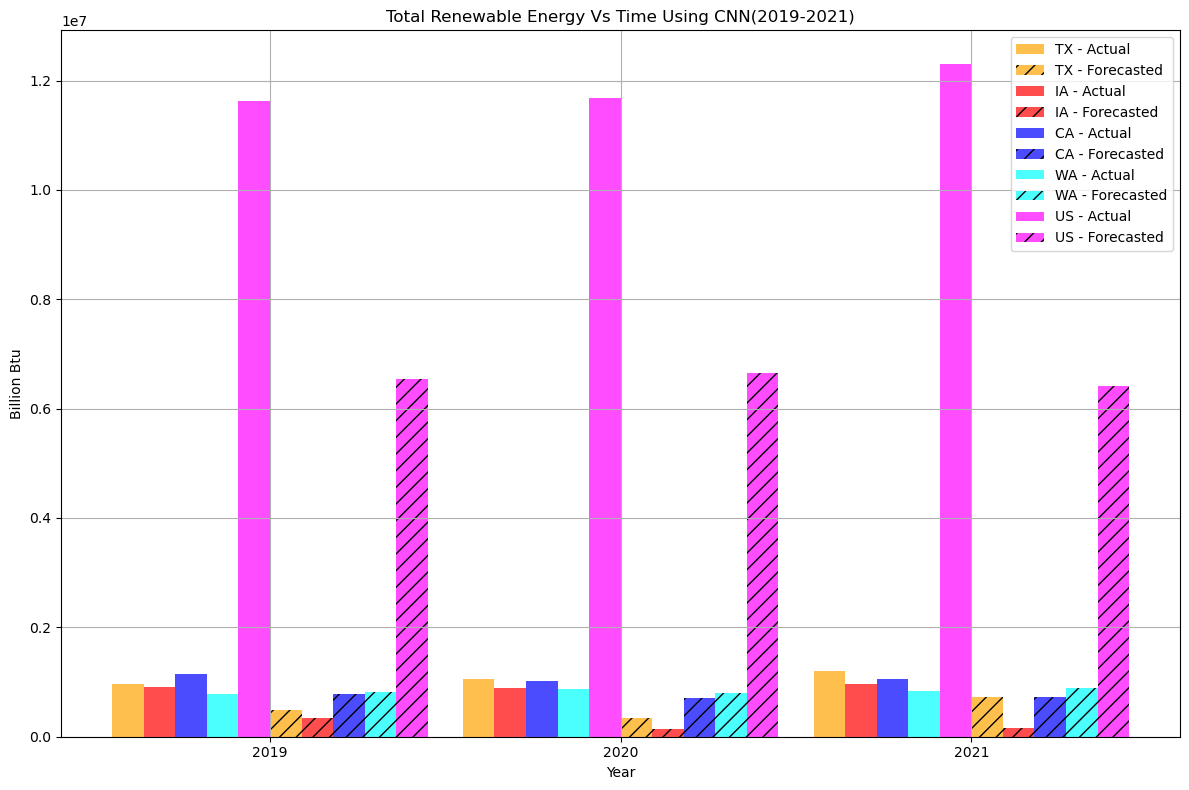

In [57]:
# Define the list of state abbreviations to plot
state_abbreviations =  ['TX','IA','CA','WA','US']

# Use iloc to get the required years (2019 to 2021) from the end
selected_years = Renewables_Total_USA_T.iloc[-3:]
years_forecast = selected_years

# Set the width of the bars
bar_width = 0.09

# Define colors for each state
state_colors = {'CA': 'blue', 'IA': 'green', 'TX': 'orange', 'IA': 'red', 'WA': 'cyan', 'US': 'magenta'}

# Create the bar plot for the actual and forecasted values
plt.figure(figsize=(12, 8))

for i, state in enumerate(state_abbreviations):
    # Calculate the x positions for the bars, introducing an offset for each state
    x_positions_actual = np.arange(len(selected_years.index)) + i * bar_width
    x_positions_forecasted = np.arange(len(years_forecast)) + (len(state_abbreviations) + i) * bar_width

    # Use the color assigned to the state for both actual and forecasted bars
    plt.bar(x_positions_actual, selected_years[state], label=f"{state} - Actual", width=bar_width, color=state_colors[state], alpha=0.7)
    plt.bar(x_positions_forecasted, state_predictions_cnn[state].values(), bar_width,
            label=f"{state} - Forecasted", hatch='//', color=state_colors[state], alpha=0.7)
# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Total Renewable Energy Vs Time Using CNN(2019-2021)')
# Add legend
plt.legend()

# Set x-axis ticks and labels
combined_years = np.arange(len(selected_years.index)) + (len(state_abbreviations) - 0.5) * bar_width
plt.xticks(combined_years, selected_years.index)  

# Add grid
plt.grid(True)
plt.tight_layout()
# Show the plot
plt.show()

### ARIMA

In [23]:
# Function to perform ARIMA forecast
def arima_forecast(state_data, state_name, order=(5, 1, 0), forecast_steps=2):
    scaler = MinMaxScaler()
    scaled_data = scaler.fit_transform(state_data.reshape(-1, 1))
    
    train_size = int(len(scaled_data) * 0.8)
    train, test = scaled_data[:train_size], scaled_data[train_size:]
    
    model = ARIMA(train, order=order)
    fit_model = model.fit()
    
    forecast_values_arima = fit_model.forecast(steps=len(scaled_data) - train_size + forecast_steps)
    forecast_values_arima = scaler.inverse_transform(forecast_values_arima.reshape(-1, 1))
    
    mse_arima = mean_squared_error(state_data[train_size:], forecast_values_arima[:len(state_data) - train_size])
    rmse_arima = np.sqrt(mse_arima)
    
    forecast_years_arima = forecast_values_arima[:len(state_data)]
    
    return mse_arima, rmse_arima, forecast_years_arima

# Selected states
selected_states = ['TX','IA','CA','WA','US']

# Dictionaries to store results
mse_arima_dict = {}
rmse_arima_dict = {}
forecast_years_arima_dict = {}
accuracy_arima_dict = {}

# Loop through each selected state for ARIMA
for state in selected_states:
    state_data = Renewables_Total.loc[state].values
    mse_arima, rmse_arima, forecast_years_arima = arima_forecast(state_data, state, order=(5, 1, 0), forecast_steps=2)
    
    mse_arima_dict[state] = mse_arima
    rmse_arima_dict[state] = rmse_arima
    forecast_years_arima_dict[state] = forecast_years_arima
    
    # Calculate accuracy for each year
    actual_data = state_data[-3:]
    forecasted_data = forecast_years_arima[:3]
    
    accuracies = 100 - np.abs((forecasted_data - actual_data) / actual_data) * 100
    
    accuracy_arima_dict[state] = {
        '2019': accuracies[0][0],
        '2020': accuracies[1][0],
        '2021': accuracies[2][0]
    }
    
    # Print the values for each year
    print(f"\n{state} - Actual Values:")
    print(f"2019: {actual_data[0]:.2f}, 2020: {actual_data[1]:.2f}, 2021: {actual_data[2]:.2f}")

    print(f"{state} - Forecasted Values:")
    print(f"2019: {forecasted_data[0][0]:.2f}, 2020: {forecasted_data[1][0]:.2f}, 2021: {forecasted_data[2][0]:.2f}")

    # Print forecast values for 2022 and 2023
    print(f"{state} - Forecasted Values for 2022 and 2023:")
    for year, forecast_value in zip(range(2022, 2024), forecast_years_arima[3:]):
        print(f"{year}: {forecast_value[0]:.2f}")

    # Print the accuracy for each year
    print(f"Accuracy for {state} (ARIMA) - 2019: {accuracy_arima_dict[state]['2019']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2020: {accuracy_arima_dict[state]['2020']:.2f}%")
    print(f"Accuracy for {state} (ARIMA) - 2021: {accuracy_arima_dict[state]['2021']:.2f}")
    print(f"Mean Squared Error (MSE) for {state} (ARIMA): {mse_arima:.2f}")
    print(f"Root Mean Squared Error (RMSE) for {state} (ARIMA): {rmse_arima:.2f}\n")
# Print the forecasted values for 2022 and 2023 for all states
print("\nForecasted Values for 2022 and 2023 (ARIMA):")
for year in range(2022, 2024):
    print(f"Forecasts for {year}:")
    for state in selected_states:
        forecast_value = forecast_years_arima_dict[state][year - 2019][0]
        print(f"{state}: {forecast_value:.2f}")

# Print MSE for all states
print("\nMean Squared Error (MSE) for All states:")
for state, mse_value in mse_arima_dict.items():
    print(f"MSE for {state} (ARIMA): {mse_value:.2f}")

# Print RMSE for all states
print("\nRoot Mean Squared Error (RMSE) for All states:")
for state, rmse_value in rmse_arima_dict.items():
    print(f"RMSE for {state} (ARIMA): {rmse_value:.2f}")



TX - Actual Values:
2019: 963037.00, 2020: 1058610.00, 2021: 1197430.00
TX - Forecasted Values:
2019: 384184.34, 2020: 461543.40, 2021: 540392.62
TX - Forecasted Values for 2022 and 2023:
2022: 593555.49
2023: 654546.22
Accuracy for TX (ARIMA) - 2019: 39.89%
Accuracy for TX (ARIMA) - 2020: 47.93%
Accuracy for TX (ARIMA) - 2021: 56.11
Mean Squared Error (MSE) for TX (ARIMA): 13595208642.28
Root Mean Squared Error (RMSE) for TX (ARIMA): 116598.49


IA - Actual Values:
2019: 901797.00, 2020: 899796.00, 2021: 958793.00
IA - Forecasted Values:
2019: 478301.36, 2020: 540117.38, 2021: 598825.77
IA - Forecasted Values for 2022 and 2023:
2022: 653241.72
2023: 703393.02
Accuracy for IA (ARIMA) - 2019: 53.04%
Accuracy for IA (ARIMA) - 2020: 59.89%
Accuracy for IA (ARIMA) - 2021: 66.40
Mean Squared Error (MSE) for IA (ARIMA): 2089311732.61
Root Mean Squared Error (RMSE) for IA (ARIMA): 45708.99


CA - Actual Values:
2019: 1154051.00, 2020: 1027627.00, 2021: 1053602.00
CA - Forecasted Values:
2019

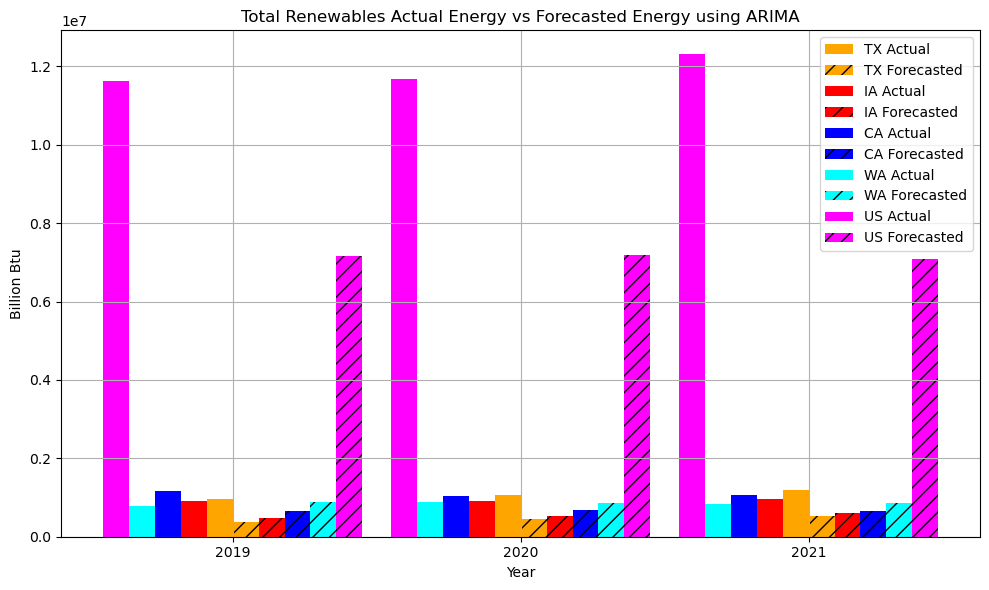

In [25]:
# Define colors for each state
state_colors = {'CA': 'blue', 'IA': 'green', 'TX': 'orange', 'IA': 'red', 'WA': 'cyan', 'US': 'magenta'}

# Create a new figure
plt.figure(figsize=(10, 6))

# Define the width of the bars and the space between bar groups
bar_width = 0.09
space = np.arange(len(range(2019, 2022)))

# Loop through each selected state
for i, state in enumerate(selected_states):
    # Extract actual and forecasted data
    actual_data = Renewables_Total.loc[state].values[-3:]
    forecasted_data = np.array(forecast_years_arima_dict[state][:3]).flatten() 

    # Generate x values (years)
    years = range(2019, 2022)

    # Plot actual data with custom color on the left side
    plt.bar(space - bar_width/2 - i*bar_width, actual_data, bar_width, label=f'{state} Actual', color=state_colors[state])

    # Plot forecasted data with hatch pattern and custom color on the right side
    plt.bar(space + bar_width/2 + i*bar_width, forecasted_data, bar_width, label=f'{state} Forecasted', color=state_colors[state], hatch='//')

# x-labels
plt.xlabel('Year')
# y-labels 
plt.ylabel('Billion Btu')
# title
plt.title('Total Renewables Actual Energy vs Forecasted Energy using ARIMA')

# Add xticks
plt.xticks(space, years)

# Add a legend
plt.legend()

# Add grid
plt.grid(True)
plt.tight_layout()

# Show the plot
plt.show()
